# Desafio DS - Lighthouse

## 1. Coleta de dados:

In [372]:
# Importando bibliotecas necessárias:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import OleFileIO_PL
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima

In [373]:
# Abrindo o arquivo para utilizar como dataframe:
path = 'imf-dm-export-20230513.xls'
with open(path,'rb') as file:
    ole = OleFileIO_PL.OleFileIO(file)
    if ole.exists('Workbook'):
        d = ole.openstream('Workbook')
        df=pd.read_excel(d,engine='xlrd')
        print(df.head())

  Real GDP growth (Annual percent change)     1980     1981     1982     1983  \
0                                     NaN      NaN      NaN      NaN      NaN   
1                             Afghanistan  no data  no data  no data  no data   
2                                 Albania      2.7      5.7      2.9      1.1   
3                                 Algeria     -5.4        3      6.4      5.4   
4                                 Andorra  no data  no data  no data  no data   

      1984     1985     1986     1987     1988  ... 2019  2020     2021  \
0      NaN      NaN      NaN      NaN      NaN  ...  NaN   NaN      NaN   
1  no data  no data  no data  no data  no data  ...  3.9  -2.4  no data   
2        2     -1.5      5.6     -0.8     -1.4  ...  2.1  -3.5      8.5   
3      5.6      5.6     -0.2     -0.7     -1.9  ...    1  -5.1      3.4   
4  no data  no data  no data  no data  no data  ...    2 -11.2      8.9   

      2022     2023     2024     2025     2026     2027     20

##  2. Limpeza e Pré-processamento de dados:

In [374]:
# Descobrindo qual o tipo dos dados do dataframe:
df.dtypes

Real GDP growth (Annual percent change)    object
1980                                       object
1981                                       object
1982                                       object
1983                                       object
1984                                       object
1985                                       object
1986                                       object
1987                                       object
1988                                       object
1989                                       object
1990                                       object
1991                                       object
1992                                       object
1993                                       object
1994                                       object
1995                                       object
1996                                       object
1997                                       object
1998                                       object


In [375]:
# Descobrindo qual coluna tem valores nulos:
print(df.isnull().sum())

Real GDP growth (Annual percent change)    2
1980                                       3
1981                                       3
1982                                       3
1983                                       3
1984                                       3
1985                                       3
1986                                       3
1987                                       3
1988                                       3
1989                                       3
1990                                       3
1991                                       3
1992                                       3
1993                                       3
1994                                       3
1995                                       3
1996                                       3
1997                                       3
1998                                       3
1999                                       3
2000                                       3
2001      

In [376]:
# Descobrindo qual linha tem valores nulos:
print(df.isnull().sum(axis=1))

0      50
1       0
2       0
3       0
4       0
       ..
226     0
227     0
228     0
229    50
230    49
Length: 231, dtype: int64


In [377]:
# Checando os dados tem nas linhas com valores nulos:
linhas = [0, 229, 230]

print(df.iloc[linhas])

    Real GDP growth (Annual percent change) 1980 1981 1982 1983 1984 1985  \
0                                       NaN  NaN  NaN  NaN  NaN  NaN  NaN   
229                                     NaN  NaN  NaN  NaN  NaN  NaN  NaN   
230                              ©IMF, 2023  NaN  NaN  NaN  NaN  NaN  NaN   

    1986 1987 1988  ... 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028  
0    NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
229  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
230  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[3 rows x 50 columns]


In [378]:
# Removendo as linhas com valores vazios e sem dados:
remover_linhas = [0, 229, 230]
df = df.drop(remover_linhas)

In [379]:
# Checando para ver se ainda há linhas com nulos:
print(df.isnull().sum(axis=1))

1      0
2      0
3      0
4      0
5      0
      ..
224    0
225    0
226    0
227    0
228    0
Length: 228, dtype: int64


In [380]:
# Analisando como estão os dados:
print(df.head())

  Real GDP growth (Annual percent change)     1980     1981     1982     1983  \
1                             Afghanistan  no data  no data  no data  no data   
2                                 Albania      2.7      5.7      2.9      1.1   
3                                 Algeria     -5.4        3      6.4      5.4   
4                                 Andorra  no data  no data  no data  no data   
5                                  Angola      2.4     -4.4        0      4.2   

      1984     1985     1986     1987     1988  ... 2019  2020     2021  \
1  no data  no data  no data  no data  no data  ...  3.9  -2.4  no data   
2        2     -1.5      5.6     -0.8     -1.4  ...  2.1  -3.5      8.5   
3      5.6      5.6     -0.2     -0.7     -1.9  ...    1  -5.1      3.4   
4  no data  no data  no data  no data  no data  ...    2 -11.2      8.9   
5        6      3.5      2.9      4.1      6.1  ... -0.7  -5.6      1.1   

      2022     2023     2024     2025     2026     2027     20

In [381]:
# Convertendo os dados que contém 'no data' como nulos apenas para as colunas em que há dados:
colunas_para_converter = df.columns[1:]
df[colunas_para_converter] = df[colunas_para_converter].replace('no data', np.nan)
print(df.head())

  Real GDP growth (Annual percent change)  1980  1981  1982  1983  1984  1985  \
1                             Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   
2                                 Albania   2.7   5.7   2.9   1.1   2.0  -1.5   
3                                 Algeria  -5.4   3.0   6.4   5.4   5.6   5.6   
4                                 Andorra   NaN   NaN   NaN   NaN   NaN   NaN   
5                                  Angola   2.4  -4.4   0.0   4.2   6.0   3.5   

   1986  1987  1988  ...  2019  2020  2021  2022  2023  2024  2025  2026  \
1   NaN   NaN   NaN  ...   3.9  -2.4   NaN   NaN   NaN   NaN   NaN   NaN   
2   5.6  -0.8  -1.4  ...   2.1  -3.5   8.5   3.7   2.2   3.3   3.4   3.4   
3  -0.2  -0.7  -1.9  ...   1.0  -5.1   3.4   2.9   2.6   2.6   2.2   2.1   
4   NaN   NaN   NaN  ...   2.0 -11.2   8.9   8.7   1.3   1.5   1.5   1.5   
5   2.9   4.1   6.1  ...  -0.7  -5.6   1.1   2.8   3.5   3.7   4.0   4.1   

   2027  2028  
1   NaN   NaN  
2   3.4   3.4  
3   1.7 

In [382]:
# Checando para ver qual o tipo dos dados do dataframe após a conversão:
df.dtypes

Real GDP growth (Annual percent change)     object
1980                                       float64
1981                                       float64
1982                                       float64
1983                                       float64
1984                                       float64
1985                                       float64
1986                                       float64
1987                                       float64
1988                                       float64
1989                                       float64
1990                                       float64
1991                                       float64
1992                                       float64
1993                                       float64
1994                                       float64
1995                                       float64
1996                                       float64
1997                                       float64
1998                           

## 3. EDA:

In [383]:
# Coletando as informações dos dados por coluna:
print(df.describe())

             1980        1981        1982        1983        1984        1985  \
count  169.000000  173.000000  174.000000  174.000000  174.000000  174.000000   
mean     2.872189    2.444509    1.303448    1.936782    4.177586    3.129310   
std      5.417190    5.465041    5.964451    5.150310    6.281408    4.490556   
min    -21.600000  -20.000000  -36.800000  -16.100000  -16.800000  -13.000000   
25%      0.100000    0.100000   -0.800000   -1.000000    1.925000    1.100000   
50%      3.300000    2.600000    1.500000    2.400000    4.100000    3.500000   
75%      5.800000    5.500000    4.100000    4.600000    6.100000    5.300000   
max     18.800000   17.100000   23.200000   22.700000   44.500000   24.300000   

             1986        1987        1988        1989  ...        2019  \
count  175.000000  176.000000  177.000000  177.000000  ...  227.000000   
mean     3.742286    3.710227    4.140678    3.468362  ...    2.588987   
std      4.436724    4.966437    5.652045    5.9

In [384]:
# Coletando as informações dos dados por linha:
def calculate_stats(row):
    count = row.count()
    mean = row.mean()
    std = row.std()
    median = row.median()
    min_value = row.min()
    max_value = row.max()
    quartiles = row.quantile([0.25, 0.5, 0.75])
    return pd.Series({
        'Count': count,
        'Mean': mean,
        'Std': std,
        'Median': median,
        'Min': min_value,
        '25%': quartiles[0.25],
        '50%': quartiles[0.5],
        '75%': quartiles[0.75],
        'Max': max_value
    })

statistics_by_row = df.iloc[0:, 1:].apply(calculate_stats, axis=1)

print(statistics_by_row)

     Count      Mean       Std  Median   Min    25%   50%    75%   Max
1     18.0  6.122222  5.790312    4.65  -2.4  2.300  4.65  8.625  20.6
2     49.0  2.883673  6.490742    3.40 -28.0  2.000  3.40  5.900  12.9
3     49.0  2.406122  2.629275    2.90  -5.4  1.400  2.90  3.800   7.2
4     28.0  1.660714  4.819816    1.50 -11.2  0.225  1.50  4.575   8.9
5     49.0  4.785714  4.979332    4.10  -5.6  2.200  4.10  8.500  15.0
..     ...       ...       ...     ...   ...    ...   ...    ...   ...
224   49.0  2.034694  1.712156    2.10  -4.5  1.400  2.10  2.900   5.3
225   49.0  3.393878  2.610668    3.40  -2.7  1.700  3.40  4.900  10.2
226   49.0  3.583673  1.769339    3.80  -1.6  2.300  3.80  4.900   6.6
227   38.0  3.892105  1.911188    4.15  -1.7  3.200  4.15  4.875   6.9
228   49.0  3.334694  1.476278    3.40  -2.8  2.800  3.40  3.900   6.3

[228 rows x 9 columns]


### 3.1. Dataframe Pivotado:

In [385]:
# Realizando ajustes para transpor o dataframe:
cols_years = df.columns[1:]
df_melted = df.melt(id_vars=df.columns[0], value_vars=cols_years, var_name='Year', value_name='GDP Growth (%)')
print(df_melted.head())

  Real GDP growth (Annual percent change)  Year  GDP Growth (%)
0                             Afghanistan  1980             NaN
1                                 Albania  1980             2.7
2                                 Algeria  1980            -5.4
3                                 Andorra  1980             NaN
4                                  Angola  1980             2.4


In [386]:
# Transpondo o dataframe:
df_pivoted = df_melted.pivot(index='Year', columns=df.columns[0], values='GDP Growth (%)')
print(df_pivoted.head())

Real GDP growth (Annual percent change)  ASEAN-5  Advanced economies  \
Year                                                                   
1980                                         7.7                 1.3   
1981                                         6.5                 2.0   
1982                                         3.8                 0.2   
1983                                         4.5                 3.2   
1984                                         4.6                 4.8   

Real GDP growth (Annual percent change)  Afghanistan  Africa (Region)  \
Year                                                                    
1980                                             NaN              NaN   
1981                                             NaN              NaN   
1982                                             NaN              NaN   
1983                                             NaN              NaN   
1984                                             NaN     

In [387]:
# Retirando o cabeçalho do índice:
df_pivoted.columns.name = None
print(df_pivoted.head())

      ASEAN-5  Advanced economies  Afghanistan  Africa (Region)  Albania  \
Year                                                                       
1980      7.7                 1.3          NaN              NaN      2.7   
1981      6.5                 2.0          NaN              NaN      5.7   
1982      3.8                 0.2          NaN              NaN      2.9   
1983      4.5                 3.2          NaN              NaN      1.1   
1984      4.6                 4.8          NaN              NaN      2.0   

      Algeria  Andorra  Angola  Antigua and Barbuda  Argentina  ...  Vanuatu  \
Year                                                            ...            
1980     -5.4      NaN     2.4                  8.2        0.7  ...      5.5   
1981      3.0      NaN    -4.4                  3.8       -5.7  ...      4.4   
1982      6.4      NaN     0.0                 -0.1       -3.1  ...      2.0   
1983      5.4      NaN     4.2                  5.4        3.7  ...

In [388]:
# Reordenando as colunas:
ordem_colunas = ["Afghanistan",
"Albania",
"Algeria",
"Andorra",
"Angola",
"Antigua and Barbuda",
"Argentina",
"Armenia",
"Aruba",
"Australia",
"Austria",
"Azerbaijan",
"Bahamas, The",
"Bahrain",
"Bangladesh",
"Barbados",
"Belarus",
"Belgium",
"Belize",
"Benin",
"Bhutan",
"Bolivia",
"Bosnia and Herzegovina",
"Botswana",
"Brazil",
"Brunei Darussalam",
"Bulgaria",
"Burkina Faso",
"Burundi",
"Cabo Verde",
"Cambodia",
"Cameroon",
"Canada",
"Central African Republic",
"Chad",
"Chile",
"China, People's Republic of",
"Colombia",
"Comoros",
"Congo, Dem. Rep. of the",
"Congo, Republic of ",
"Costa Rica",
"Croatia",
"Cyprus",
"Czech Republic",
"Côte d'Ivoire",
"Denmark",
"Djibouti",
"Dominica",
"Dominican Republic",
"Ecuador",
"Egypt",
"El Salvador",
"Equatorial Guinea",
"Eritrea",
"Estonia",
"Eswatini",
"Ethiopia",
"Fiji",
"Finland",
"France",
"Gabon",
"Gambia, The",
"Georgia",
"Germany",
"Ghana",
"Greece",
"Grenada",
"Guatemala",
"Guinea",
"Guinea-Bissau",
"Guyana",
"Haiti",
"Honduras",
"Hong Kong SAR",
"Hungary",
"Iceland",
"India",
"Indonesia",
"Iran",
"Iraq",
"Ireland",
"Israel",
"Italy",
"Jamaica",
"Japan",
"Jordan",
"Kazakhstan",
"Kenya",
"Kiribati",
"Korea, Republic of",
"Kosovo",
"Kuwait",
"Kyrgyz Republic",
"Lao P.D.R.",
"Latvia",
"Lebanon",
"Lesotho",
"Liberia",
"Libya",
"Lithuania",
"Luxembourg",
"Macao SAR",
"Madagascar",
"Malawi",
"Malaysia",
"Maldives",
"Mali",
"Malta",
"Marshall Islands",
"Mauritania",
"Mauritius",
"Mexico",
"Micronesia, Fed. States of",
"Moldova",
"Mongolia",
"Montenegro",
"Morocco",
"Mozambique",
"Myanmar",
"Namibia",
"Nauru",
"Nepal",
"Netherlands",
"New Zealand",
"Nicaragua",
"Niger",
"Nigeria",
"North Macedonia ",
"Norway",
"Oman",
"Pakistan",
"Palau",
"Panama",
"Papua New Guinea",
"Paraguay",
"Peru",
"Philippines",
"Poland",
"Portugal",
"Puerto Rico",
"Qatar",
"Romania",
"Russian Federation",
"Rwanda",
"Saint Kitts and Nevis",
"Saint Lucia",
"Saint Vincent and the Grenadines",
"Samoa",
"San Marino",
"Saudi Arabia",
"Senegal",
"Serbia",
"Seychelles",
"Sierra Leone",
"Singapore",
"Slovak Republic",
"Slovenia",
"Solomon Islands",
"Somalia",
"South Africa",
"South Sudan, Republic of",
"Spain",
"Sri Lanka",
"Sudan",
"Suriname",
"Sweden",
"Switzerland",
"Syria",
"São Tomé and Príncipe",
"Taiwan Province of China",
"Tajikistan",
"Tanzania",
"Thailand",
"Timor-Leste",
"Togo",
"Tonga",
"Trinidad and Tobago",
"Tunisia",
"Turkmenistan",
"Tuvalu",
"Türkiye, Republic of",
"Uganda",
"Ukraine",
"United Arab Emirates",
"United Kingdom",
"United States",
"Uruguay",
"Uzbekistan",
"Vanuatu",
"Venezuela",
"Vietnam",
"West Bank and Gaza",
"Yemen",
"Zambia",
"Zimbabwe",
"Africa (Region)",
"Asia and Pacific",
"Australia and New Zealand",
"Caribbean",
"Central America",
"Central Asia and the Caucasus",
"East Asia",
"Eastern Europe ",
"Europe",
"Middle East (Region)",
"North Africa",
"North America",
"Pacific Islands ",
"South America",
"South Asia",
"Southeast Asia",
"Sub-Saharan Africa (Region) ",
"Western Europe",
"Western Hemisphere (Region)",
"ASEAN-5",
"Advanced economies",
"Emerging and Developing Asia",
"Emerging and Developing Europe",
"Emerging market and developing economies",
"Euro area",
"European Union",
"Latin America and the Caribbean",
"Major advanced economies (G7)",
"Middle East and Central Asia",
"Other advanced economies",
"Sub-Saharan Africa",
"World"]

df_pivoted = df_pivoted[ordem_colunas]

print(df_pivoted.head())

      Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
Year                                                                        
1980          NaN      2.7     -5.4      NaN     2.4                  8.2   
1981          NaN      5.7      3.0      NaN    -4.4                  3.8   
1982          NaN      2.9      6.4      NaN     0.0                 -0.1   
1983          NaN      1.1      5.4      NaN     4.2                  5.4   
1984          NaN      2.0      5.6      NaN     6.0                 10.2   

      Argentina  Armenia  Aruba  Australia  ...  \
Year                                        ...   
1980        0.7      NaN    NaN        2.9  ...   
1981       -5.7      NaN    NaN        4.1  ...   
1982       -3.1      NaN    NaN        0.1  ...   
1983        3.7      NaN    NaN       -0.5  ...   
1984        2.0      NaN    NaN        6.3  ...   

      Emerging and Developing Europe  \
Year                                   
1980                  

In [389]:
# Checando para ver quais países(colunas) tem dados nulos:
colunas_nulas = df_pivoted.columns[df_pivoted.isnull().any()]
qnt_nulos = df_pivoted[colunas_nulas].isnull().sum()

print("Colunas Nulas:")
print(qnt_nulos)

Colunas Nulas:
Afghanistan                      31
Andorra                          21
Armenia                          13
Aruba                             7
Azerbaijan                       13
                                 ..
Africa (Region)                  11
Central Asia and the Caucasus    13
Sub-Saharan Africa (Region)      11
Euro area                        12
Sub-Saharan Africa               11
Length: 62, dtype: int64


### 3.2 Dataframe - Region

In [390]:
# Criando uma cópia do dataframa para lidar com os valores nulos por "região":
df_region = df_pivoted.copy()
print(df_region.head())

      Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
Year                                                                        
1980          NaN      2.7     -5.4      NaN     2.4                  8.2   
1981          NaN      5.7      3.0      NaN    -4.4                  3.8   
1982          NaN      2.9      6.4      NaN     0.0                 -0.1   
1983          NaN      1.1      5.4      NaN     4.2                  5.4   
1984          NaN      2.0      5.6      NaN     6.0                 10.2   

      Argentina  Armenia  Aruba  Australia  ...  \
Year                                        ...   
1980        0.7      NaN    NaN        2.9  ...   
1981       -5.7      NaN    NaN        4.1  ...   
1982       -3.1      NaN    NaN        0.1  ...   
1983        3.7      NaN    NaN       -0.5  ...   
1984        2.0      NaN    NaN        6.3  ...   

      Emerging and Developing Europe  \
Year                                   
1980                  

Regra para preenchimento de nulos por "região" no df_region:

- Analisar o gráfico de linhas da série temporal e caso sejam semelhantes, imputados os dados da série da região similar no lugar dos valores nulos da série de outra região.

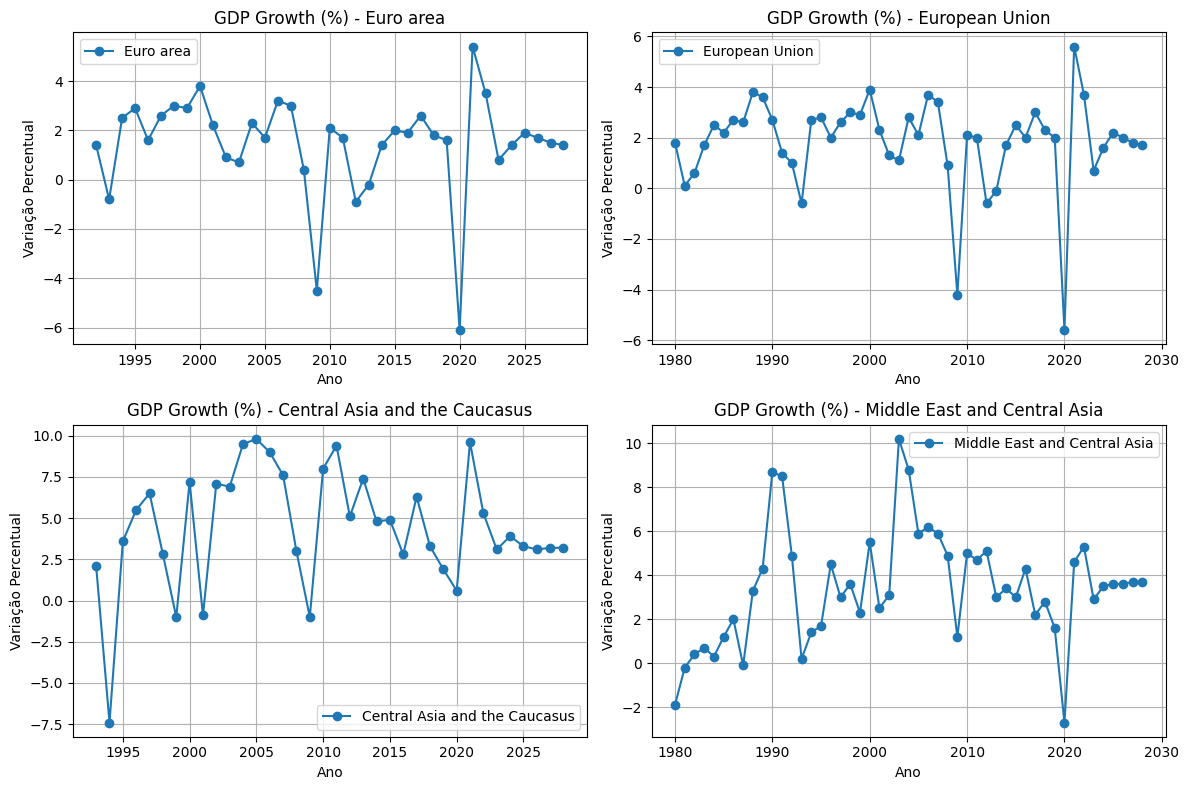

In [391]:
# Plotando em um gráfico de linhas, o comportamento da %GDP para as regiões com valores nulos:
regioes_para_plotar = ["Euro area", "European Union", "Central Asia and the Caucasus", "Middle East and Central Asia"]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, regiao in enumerate(regioes_para_plotar):
    row = i // 2
    col = i % 2

    axs[row, col].plot(df_region.index, df_region[regiao], marker='o', linestyle='-', label=regiao)
    axs[row, col].set_title(f"GDP Growth (%) - {regiao}")
    axs[row, col].set_xlabel("Ano")
    axs[row, col].set_ylabel("Variação Percentual")
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

In [392]:
# Copiando os valores de %GDP da região "European Union" no lugar dos valores nulos de "Euro area" em um subset separado do dataframe:
euro_subset = df_region[["European Union", "Euro area"]]
euro_subset["Euro area"].fillna(euro_subset["European Union"], inplace=True)
print(euro_subset)

      European Union  Euro area
Year                           
1980             1.8        1.8
1981             0.1        0.1
1982             0.6        0.6
1983             1.7        1.7
1984             2.5        2.5
1985             2.2        2.2
1986             2.7        2.7
1987             2.6        2.6
1988             3.8        3.8
1989             3.6        3.6
1990             2.7        2.7
1991             1.4        1.4
1992             1.0        1.4
1993            -0.6       -0.8
1994             2.7        2.5
1995             2.8        2.9
1996             2.0        1.6
1997             2.6        2.6
1998             3.0        3.0
1999             2.9        2.9
2000             3.9        3.8
2001             2.3        2.2
2002             1.3        0.9
2003             1.1        0.7
2004             2.8        2.3
2005             2.1        1.7
2006             3.7        3.2
2007             3.4        3.0
2008             0.9        0.4
2009    

/tmp/ipykernel_190/871935671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_subset["Euro area"].fillna(euro_subset["European Union"], inplace=True)


In [393]:
# Atualizando os dados do novo subset no dataframe "Region":
df_region.update(euro_subset)
print(df_region.head())

      Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
Year                                                                        
1980          NaN      2.7     -5.4      NaN     2.4                  8.2   
1981          NaN      5.7      3.0      NaN    -4.4                  3.8   
1982          NaN      2.9      6.4      NaN     0.0                 -0.1   
1983          NaN      1.1      5.4      NaN     4.2                  5.4   
1984          NaN      2.0      5.6      NaN     6.0                 10.2   

      Argentina  Armenia  Aruba  Australia  ...  \
Year                                        ...   
1980        0.7      NaN    NaN        2.9  ...   
1981       -5.7      NaN    NaN        4.1  ...   
1982       -3.1      NaN    NaN        0.1  ...   
1983        3.7      NaN    NaN       -0.5  ...   
1984        2.0      NaN    NaN        6.3  ...   

      Emerging and Developing Europe  \
Year                                   
1980                  

In [394]:
# Copiando os valores de %GDP da região "Middle East and Central Asia" nos lugar dos valores nulos de "Central Asia and the Caucasus" em um subset separado do dataframe:
asia_subset = df_region[["Middle East and Central Asia", "Central Asia and the Caucasus"]]
asia_subset["Central Asia and the Caucasus"].fillna(asia_subset["Middle East and Central Asia"], inplace=True)
print(asia_subset)

      Middle East and Central Asia  Central Asia and the Caucasus
Year                                                             
1980                          -1.9                           -1.9
1981                          -0.2                           -0.2
1982                           0.4                            0.4
1983                           0.7                            0.7
1984                           0.3                            0.3
1985                           1.2                            1.2
1986                           2.0                            2.0
1987                          -0.1                           -0.1
1988                           3.3                            3.3
1989                           4.3                            4.3
1990                           8.7                            8.7
1991                           8.5                            8.5
1992                           4.9                            4.9
1993      

/tmp/ipykernel_190/213635413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_subset["Central Asia and the Caucasus"].fillna(asia_subset["Middle East and Central Asia"], inplace=True)


In [395]:
# Atualizando os dados do novo subset no dataframe "Region":
df_region.update(asia_subset)
print(df_region.head())

      Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
Year                                                                        
1980          NaN      2.7     -5.4      NaN     2.4                  8.2   
1981          NaN      5.7      3.0      NaN    -4.4                  3.8   
1982          NaN      2.9      6.4      NaN     0.0                 -0.1   
1983          NaN      1.1      5.4      NaN     4.2                  5.4   
1984          NaN      2.0      5.6      NaN     6.0                 10.2   

      Argentina  Armenia  Aruba  Australia  ...  \
Year                                        ...   
1980        0.7      NaN    NaN        2.9  ...   
1981       -5.7      NaN    NaN        4.1  ...   
1982       -3.1      NaN    NaN        0.1  ...   
1983        3.7      NaN    NaN       -0.5  ...   
1984        2.0      NaN    NaN        6.3  ...   

      Emerging and Developing Europe  \
Year                                   
1980                  

In [396]:
# Separando em listas os países que correspondem aos grupos: "Africa Region" e "Sub Saharan Region":
african_region = ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", "Cabo Verde",
                     "Central African Republic", "Chad", "Comoros", "Congo, Dem. Rep. of the", "Djibouti", "Egypt",
                     "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Ghana", "Guinea", "Guinea-Bissau",
                     "Côte d'Ivoire", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania",
                     "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Congo, Republic of ", "Rwanda",
                     "São Tomé and Príncipe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa",
                     "South Sudan, Republic of", "Sudan", "Tanzania", "Gambia, The", "Togo", "Tunisia", "Uganda",
                     "Zambia", "Zimbabwe"]
sub_saharan_region = ["Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon",
                      "Central African Republic", "Chad", "Comoros", "Congo, Dem. Rep. of the",
                      "Congo, Republic of ", "Côte d'Ivoire", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia",
                      "Gabon", "Gambia, The", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia",
                      "Madagascar", "Malawi", "Mali", "Mauritius", "Mozambique", "Namibia", "Niger", "Nigeria",
                      "Rwanda", "São Tomé and Príncipe", "Senegal", "Seychelles", "Sierra Leone", "South Africa",
                      "South Sudan, Republic of", "Tanzania", "Togo", "Uganda", "Zambia", "Zimbabwe"]

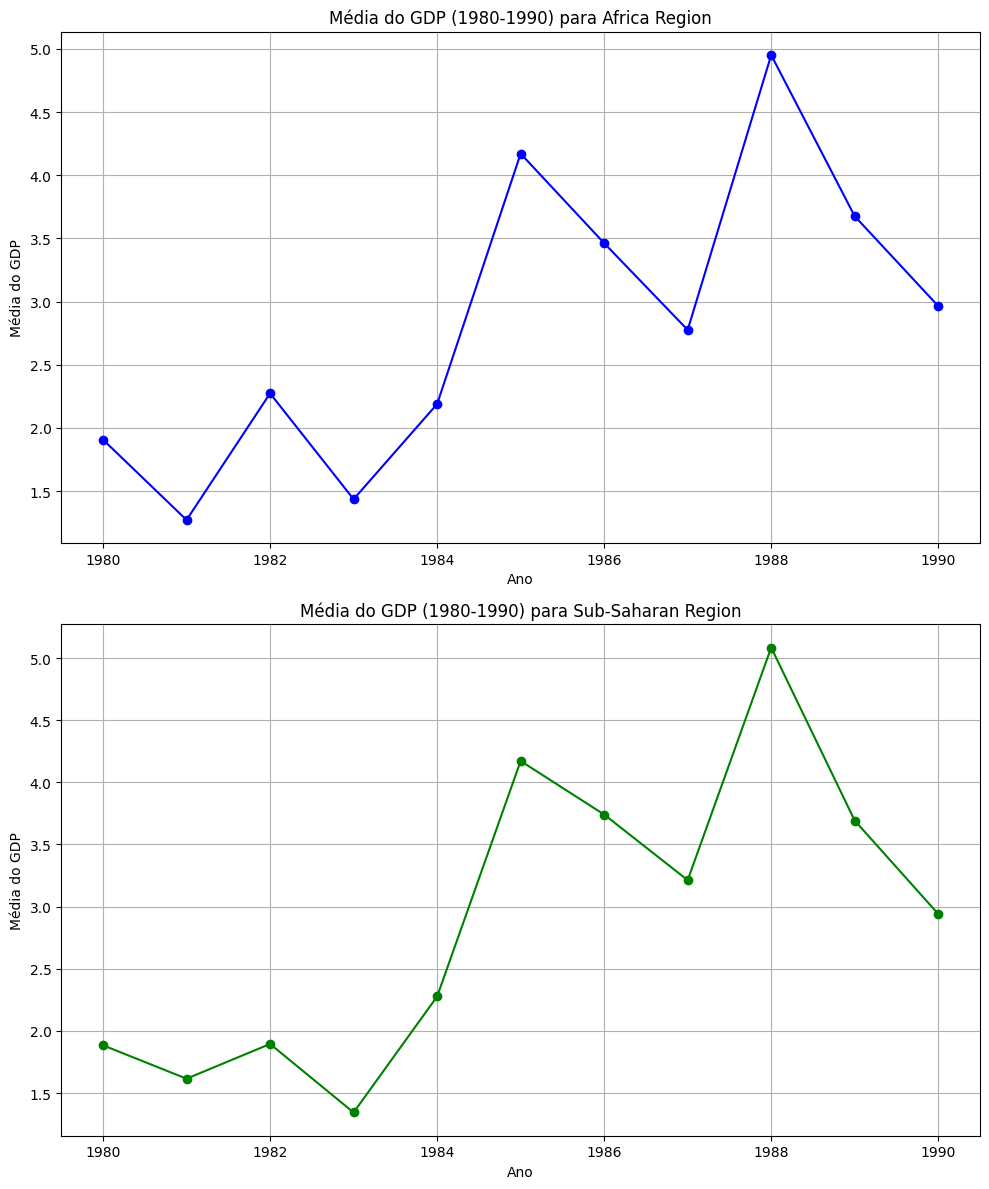

In [397]:
# Plotando o gráfico para "Africa Region" e "Sub Saharan Region":
anos_para_media = list(range(1980, 1991))

media_african_region = df_region.loc[anos_para_media, african_region].mean(axis=1)
media_sub_saharan = df_region.loc[anos_para_media, sub_saharan_region].mean(axis=1)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

axes[0].plot(anos_para_media, media_african_region, marker='o', linestyle='-', color='blue')
axes[0].set_title("Média do GDP (1980-1990) para Africa Region")
axes[0].set_xlabel("Ano")
axes[0].set_ylabel("Média do GDP")
axes[0].grid(True)


axes[1].plot(anos_para_media, media_sub_saharan, marker='o', linestyle='-', color='green')
axes[1].set_title("Média do GDP (1980-1990) para Sub-Saharan Region")
axes[1].set_xlabel("Ano")
axes[1].set_ylabel("Média do GDP")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [398]:
# Substituindo os valores do %GDP da média dos países da Africa e substituindo nos valores vazios de "Africa (Region)":
df_region["Media Africa"] = media_african_region

africa_subset = df_region[["Africa (Region)", "Media Africa"]]
africa_subset["Africa (Region)"].fillna(africa_subset["Media Africa"], inplace=True)
print(africa_subset)

      Africa (Region)  Media Africa
Year                               
1980         1.906818      1.906818
1981         1.271111      1.271111
1982         2.273333      2.273333
1983         1.435556      1.435556
1984         2.188889      2.188889
1985         4.171111      4.171111
1986         3.462222      3.462222
1987         2.775556      2.775556
1988         4.951111      4.951111
1989         3.675556      3.675556
1990         2.964444      2.964444
1991         2.300000           NaN
1992         0.100000           NaN
1993         0.900000           NaN
1994         2.500000           NaN
1995         2.600000           NaN
1996         5.000000           NaN
1997         3.200000           NaN
1998         4.000000           NaN
1999         3.100000           NaN
2000         4.300000           NaN
2001         4.500000           NaN
2002         4.900000           NaN
2003         5.500000           NaN
2004         5.900000           NaN
2005         5.900000       

/tmp/ipykernel_190/4177611391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_subset["Africa (Region)"].fillna(africa_subset["Media Africa"], inplace=True)


In [399]:
# Atualizando os valores de "Africa Region" no dataframe "Region":
df_region.update(africa_subset)
print(df_region.head())

      Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
Year                                                                        
1980          NaN      2.7     -5.4      NaN     2.4                  8.2   
1981          NaN      5.7      3.0      NaN    -4.4                  3.8   
1982          NaN      2.9      6.4      NaN     0.0                 -0.1   
1983          NaN      1.1      5.4      NaN     4.2                  5.4   
1984          NaN      2.0      5.6      NaN     6.0                 10.2   

      Argentina  Armenia  Aruba  Australia  ...  \
Year                                        ...   
1980        0.7      NaN    NaN        2.9  ...   
1981       -5.7      NaN    NaN        4.1  ...   
1982       -3.1      NaN    NaN        0.1  ...   
1983        3.7      NaN    NaN       -0.5  ...   
1984        2.0      NaN    NaN        6.3  ...   

      Emerging market and developing economies  Euro area  European Union  \
Year                     

In [400]:
# Apagando do dataframe "df_region" a coluna "media_africa":
df_region.drop("Media Africa", axis=1, inplace=True)
print(df_region.head())

      Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
Year                                                                        
1980          NaN      2.7     -5.4      NaN     2.4                  8.2   
1981          NaN      5.7      3.0      NaN    -4.4                  3.8   
1982          NaN      2.9      6.4      NaN     0.0                 -0.1   
1983          NaN      1.1      5.4      NaN     4.2                  5.4   
1984          NaN      2.0      5.6      NaN     6.0                 10.2   

      Argentina  Armenia  Aruba  Australia  ...  \
Year                                        ...   
1980        0.7      NaN    NaN        2.9  ...   
1981       -5.7      NaN    NaN        4.1  ...   
1982       -3.1      NaN    NaN        0.1  ...   
1983        3.7      NaN    NaN       -0.5  ...   
1984        2.0      NaN    NaN        6.3  ...   

      Emerging and Developing Europe  \
Year                                   
1980                  

In [401]:
# Substituindo os valores do %GDP da média dos países da Sub Saharan e substituindo no lugar dos valores nulos de "Sub Saharan Region":
df_region["Media Sub-Saharan"] = media_sub_saharan

sub_saharan_subset = df_region[["Sub-Saharan Africa (Region) ", "Sub-Saharan Africa" ,"Media Sub-Saharan"]]
sub_saharan_subset["Sub-Saharan Africa (Region) "].fillna(sub_saharan_subset["Media Sub-Saharan"], inplace=True)
sub_saharan_subset["Sub-Saharan Africa"].fillna(sub_saharan_subset["Media Sub-Saharan"], inplace=True)

print(sub_saharan_subset)

      Sub-Saharan Africa (Region)   Sub-Saharan Africa  Media Sub-Saharan
Year                                                                     
1980                      1.884211            1.884211           1.884211
1981                      1.615385            1.615385           1.615385
1982                      1.894872            1.894872           1.894872
1983                      1.343590            1.343590           1.343590
1984                      2.276923            2.276923           2.276923
1985                      4.171795            4.171795           4.171795
1986                      3.741026            3.741026           3.741026
1987                      3.212821            3.212821           3.212821
1988                      5.084615            5.084615           5.084615
1989                      3.692308            3.692308           3.692308
1990                      2.941026            2.941026           2.941026
1991                      0.500000    

/tmp/ipykernel_190/1979068494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_saharan_subset["Sub-Saharan Africa (Region) "].fillna(sub_saharan_subset["Media Sub-Saharan"], inplace=True)
/tmp/ipykernel_190/1979068494.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_saharan_subset["Sub-Saharan Africa"].fillna(sub_saharan_subset["Media Sub-Saharan"], inplace=True)


In [402]:
# Atualizando os valores de "Sub Saharan Region" no Dataframe "df_region":
df_region.update(sub_saharan_subset)
print(df_region.head())

      Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
Year                                                                        
1980          NaN      2.7     -5.4      NaN     2.4                  8.2   
1981          NaN      5.7      3.0      NaN    -4.4                  3.8   
1982          NaN      2.9      6.4      NaN     0.0                 -0.1   
1983          NaN      1.1      5.4      NaN     4.2                  5.4   
1984          NaN      2.0      5.6      NaN     6.0                 10.2   

      Argentina  Armenia  Aruba  Australia  ...  \
Year                                        ...   
1980        0.7      NaN    NaN        2.9  ...   
1981       -5.7      NaN    NaN        4.1  ...   
1982       -3.1      NaN    NaN        0.1  ...   
1983        3.7      NaN    NaN       -0.5  ...   
1984        2.0      NaN    NaN        6.3  ...   

      Emerging market and developing economies  Euro area  European Union  \
Year                     

In [403]:
# Apagando do dataframe "df_region" a coluna "media_sub_saharan":
df_region.drop("Media Sub-Saharan", axis=1, inplace=True)
print(df_region.head())

      Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
Year                                                                        
1980          NaN      2.7     -5.4      NaN     2.4                  8.2   
1981          NaN      5.7      3.0      NaN    -4.4                  3.8   
1982          NaN      2.9      6.4      NaN     0.0                 -0.1   
1983          NaN      1.1      5.4      NaN     4.2                  5.4   
1984          NaN      2.0      5.6      NaN     6.0                 10.2   

      Argentina  Armenia  Aruba  Australia  ...  \
Year                                        ...   
1980        0.7      NaN    NaN        2.9  ...   
1981       -5.7      NaN    NaN        4.1  ...   
1982       -3.1      NaN    NaN        0.1  ...   
1983        3.7      NaN    NaN       -0.5  ...   
1984        2.0      NaN    NaN        6.3  ...   

      Emerging and Developing Europe  \
Year                                   
1980                  

In [404]:
# Checando quais os países tem valores nulos:
paises_com_nulos = df_region.columns[df_region.isnull().any()]
qtd_de_nulos = df_region[paises_com_nulos].isnull().sum()

print("Países sem dados:")
print(qtd_de_nulos)

Países sem dados:
Afghanistan                   31
Andorra                       21
Armenia                       13
Aruba                          7
Azerbaijan                    13
Bangladesh                     1
Belarus                        2
Bosnia and Herzegovina        15
Brunei Darussalam              6
Cambodia                       8
Croatia                       13
Czech Republic                16
Djibouti                      11
Eritrea                       13
Estonia                       14
Georgia                       11
Guinea-Bissau                  1
Iraq                          19
Kazakhstan                    13
Kosovo                        21
Kyrgyz Republic               13
Latvia                        13
Lebanon                        8
Liberia                       21
Lithuania                     16
Macao SAR                     22
Marshall Islands              18
Mauritania                    11
Micronesia, Fed. States of    16
Moldova                  

#### Regra para substituição de valores nulos por país:

| Quantidade de nulos | Regra a seguir |
| ------------------- | -------------- |
| Se  < 5 | Preencher com a média dos outros anos. |
| Se >= 5 e <= 20 | Analisar gráfico temporal. Caso a distribuição seja simular ao do grupo da sua região, preencher os nulos com os valores do grupo, caso não, preencher com a mediana do país. |
| Se > 20 | Preencher com a mediana da série temporal do país. |

In [405]:
# Criando um novo df para os países africanos:
df_african = df_region.copy()

In [406]:
# Separando os países africanos com valores nulos em um subgrupo:
africa_com_nulos = df_african[['Africa (Region)', 'Eritrea', 'Guinea-Bissau', 'Liberia', 'Namibia', 'Nigeria', 'South Sudan, Republic of', 'Zimbabwe']].isnull().any()
qtd_de_nulos = df_african[['Africa (Region)', 'Eritrea', 'Guinea-Bissau', 'Liberia', 'Namibia', 'Nigeria', 'South Sudan, Republic of', 'Zimbabwe']].isnull().sum()

print("Africa sem dados:")
print(qtd_de_nulos)

Africa sem dados:
Africa (Region)              0
Eritrea                     13
Guinea-Bissau                1
Liberia                     21
Namibia                     11
Nigeria                     11
South Sudan, Republic of    32
Zimbabwe                    19
dtype: int64


In [407]:
# Preenchendo o valor nulo da "Guinea-Bissau" com a média do valor dos outros anos:
media_guinea_bissau = df_african["Guinea-Bissau"].mean()
df_african["Guinea-Bissau"].fillna(media_guinea_bissau, inplace=True)

print(df_african['Guinea-Bissau'])

Year
1980     3.302083
1981    -0.500000
1982     4.200000
1983    -3.400000
1984     5.500000
1985     4.300000
1986    -1.000000
1987     5.600000
1988     2.000000
1989     2.900000
1990     4.600000
1991     7.300000
1992     3.100000
1993     2.300000
1994     3.000000
1995     4.000000
1996     3.700000
1997     6.000000
1998   -22.400000
1999    16.800000
2000     1.100000
2001     4.800000
2002     3.700000
2003    -0.300000
2004     1.200000
2005     6.600000
2006     2.700000
2007     2.600000
2008     4.500000
2009     2.400000
2010     5.600000
2011     8.100000
2012    -1.700000
2013     3.300000
2014     1.000000
2015     6.100000
2016     5.300000
2017     4.800000
2018     3.800000
2019     4.500000
2020     1.500000
2021     6.400000
2022     3.500000
2023     4.500000
2024     5.000000
2025     5.000000
2026     5.000000
2027     5.000000
2028     4.500000
Name: Guinea-Bissau, dtype: float64


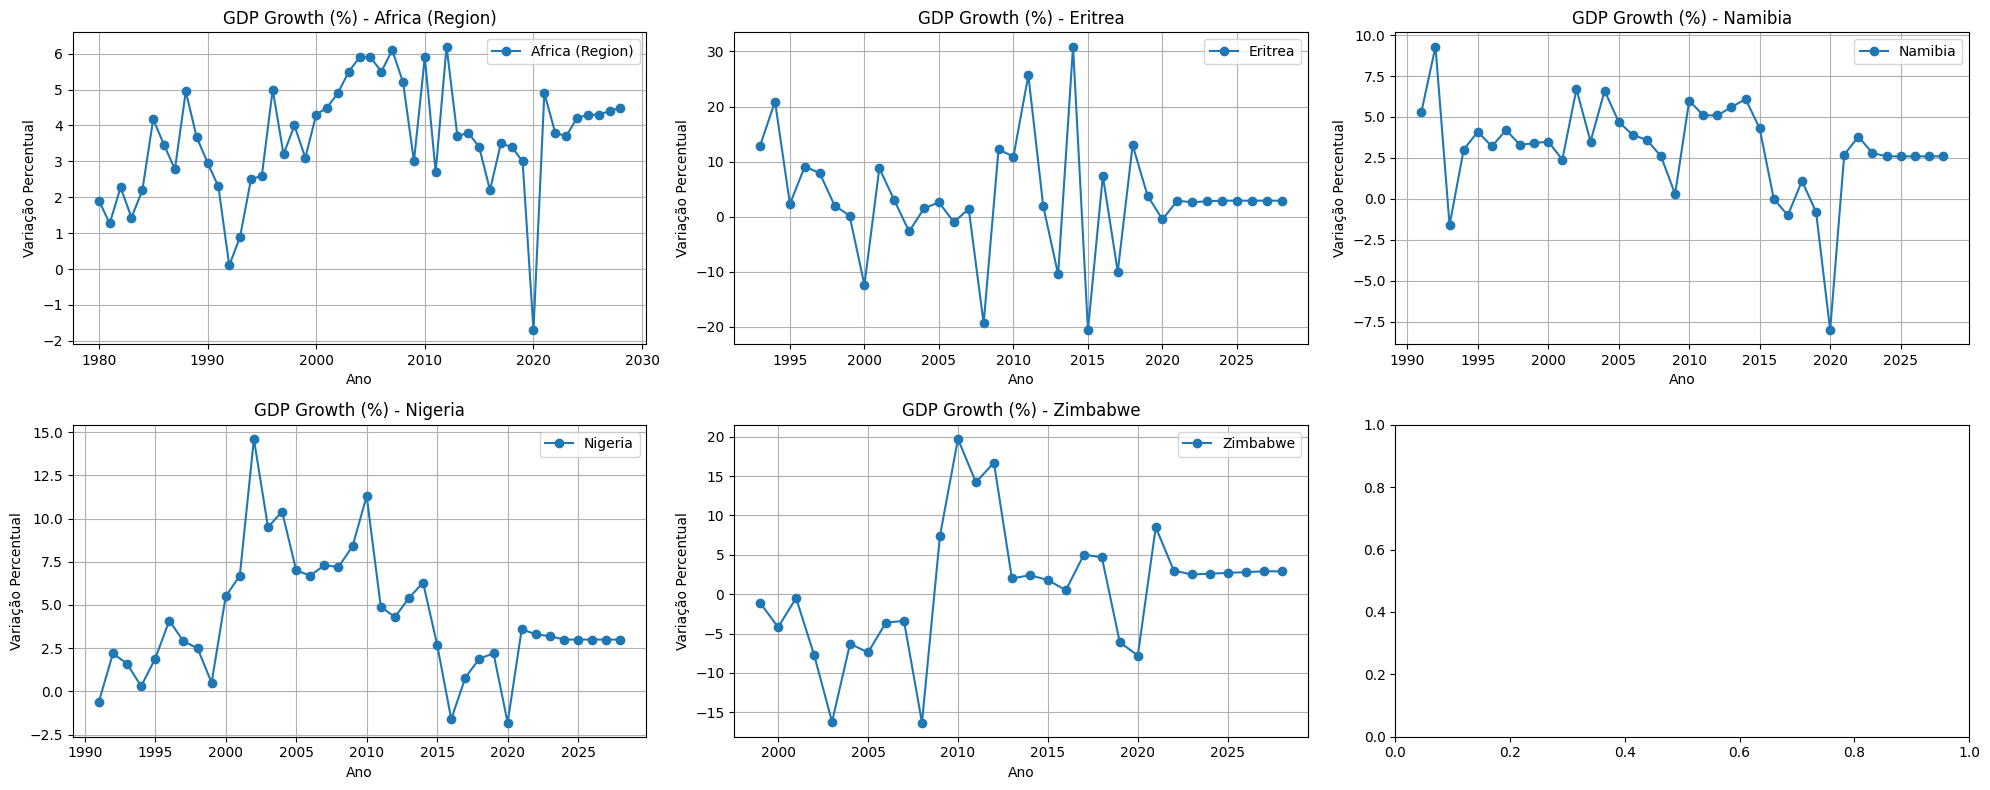

In [408]:
# Plotando os gráficos da "Africa Region", "Eritrea", "Namibia", "Zimbabwe":
regiao = ["Africa (Region)", "Eritrea", "Namibia", "Nigeria", "Zimbabwe"]

fig, axs = plt.subplots(2, 3, figsize=(20, 8))

for i, regiao in enumerate(regiao):
    row = i // 3
    col = i % 3

    axs[row, col].plot(df_african.index, df_african[regiao], marker='o', linestyle='-', label=regiao)
    axs[row, col].set_title(f"GDP Growth (%) - {regiao}")
    axs[row, col].set_xlabel("Ano")
    axs[row, col].set_ylabel("Variação Percentual")
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

In [409]:
# Substituindo os valores nulos de "Eritrea", "Namibia", "Zimbabwe" com os valores de "Africa Region":
df_african["Namibia"].fillna(df_african["Africa (Region)"], inplace=True)
df_african["Eritrea"].fillna(df_african["Africa (Region)"], inplace=True)
df_african["Nigeria"].fillna(df_african["Africa (Region)"], inplace=True)
df_african["Zimbabwe"].fillna(df_african["Africa (Region)"], inplace=True)


print(df_african[["Namibia", "Eritrea", "Nigeria", "Zimbabwe"]])

       Namibia    Eritrea    Nigeria   Zimbabwe
Year                                           
1980  1.906818   1.906818   1.906818   1.906818
1981  1.271111   1.271111   1.271111   1.271111
1982  2.273333   2.273333   2.273333   2.273333
1983  1.435556   1.435556   1.435556   1.435556
1984  2.188889   2.188889   2.188889   2.188889
1985  4.171111   4.171111   4.171111   4.171111
1986  3.462222   3.462222   3.462222   3.462222
1987  2.775556   2.775556   2.775556   2.775556
1988  4.951111   4.951111   4.951111   4.951111
1989  3.675556   3.675556   3.675556   3.675556
1990  2.964444   2.964444   2.964444   2.964444
1991  5.300000   2.300000  -0.600000   2.300000
1992  9.300000   0.100000   2.200000   0.100000
1993 -1.600000  12.900000   1.600000   0.900000
1994  3.000000  20.900000   0.300000   2.500000
1995  4.100000   2.300000   1.900000   2.600000
1996  3.200000   9.100000   4.100000   5.000000
1997  4.200000   7.900000   2.900000   3.200000
1998  3.300000   2.000000   2.500000   4

In [410]:
# Substituindo os valores nulos de "South Sudan, Republic of" e "Liberia" por sua mediana:
df_african["South Sudan, Republic of"].fillna(df_african["South Sudan, Republic of"].median(), inplace=True)
df_african["Liberia"].fillna(df_african["Liberia"].median(), inplace=True)

print(df_african[["South Sudan, Republic of", "Liberia"]])

      South Sudan, Republic of  Liberia
Year                                   
1980                       4.4      5.1
1981                       4.4      5.1
1982                       4.4      5.1
1983                       4.4      5.1
1984                       4.4      5.1
1985                       4.4      5.1
1986                       4.4      5.1
1987                       4.4      5.1
1988                       4.4      5.1
1989                       4.4      5.1
1990                       4.4      5.1
1991                       4.4      5.1
1992                       4.4      5.1
1993                       4.4      5.1
1994                       4.4      5.1
1995                       4.4      5.1
1996                       4.4      5.1
1997                       4.4      5.1
1998                       4.4      5.1
1999                       4.4      5.1
2000                       4.4      5.1
2001                       4.4      2.8
2002                       4.4      4.4


In [411]:
# Verificando se ainda há valores nulos para os países da "Africa Region":
print(df_african[['Africa (Region)', 'Eritrea', 'Guinea-Bissau', 'Liberia', 'Namibia', 'Nigeria', 'South Sudan, Republic of', 'Zimbabwe']].isnull().sum())
print(df_african[['Africa (Region)', 'Eritrea', 'Guinea-Bissau', 'Liberia', 'Namibia', 'Nigeria', 'South Sudan, Republic of', 'Zimbabwe']].isnull().sum(axis=1))

Africa (Region)             0
Eritrea                     0
Guinea-Bissau               0
Liberia                     0
Namibia                     0
Nigeria                     0
South Sudan, Republic of    0
Zimbabwe                    0
dtype: int64
Year
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
2025    0
2026    0
2027    0
2028    0
dtype: int64


In [412]:
# Criando um novo df para os países "emergentes da asia":
df_emerging_asia = df_pivoted.copy()

In [413]:
# Separando os "emergentes da asia" com valores nulos em um subgrupo:
emerging_asia_com_nulos = df_emerging_asia[["Emerging and Developing Asia", "Bangladesh", "Brunei Darussalam", "Cambodia", "Marshall Islands", "Micronesia, Fed. States of", "Myanmar", "Nauru", "Palau", "Timor-Leste", "Tuvalu"]].isnull().any()
qtd_de_nulos = df_emerging_asia[["Emerging and Developing Asia", "Bangladesh", "Brunei Darussalam", "Cambodia", "Marshall Islands", "Micronesia, Fed. States of", "Myanmar", "Nauru", "Palau", "Timor-Leste", "Tuvalu"]].isnull().sum()

print("Emerging asia sem dados:")
print(qtd_de_nulos)

Emerging asia sem dados:
Emerging and Developing Asia     0
Bangladesh                       1
Brunei Darussalam                6
Cambodia                         8
Marshall Islands                18
Micronesia, Fed. States of      16
Myanmar                         19
Nauru                           25
Palau                           21
Timor-Leste                     21
Tuvalu                          21
dtype: int64


In [414]:
# Preenchendo o valor nulo de "Bangladesh" com a média de seus outros valores:
media_bangladesh = df_emerging_asia["Bangladesh"].mean()
df_emerging_asia["Bangladesh"].fillna(media_bangladesh, inplace=True)

print(df_emerging_asia['Bangladesh']) 

Year
1980    5.372917
1981    3.800000
1982    2.400000
1983    4.000000
1984    5.200000
1985    3.200000
1986    4.200000
1987    3.700000
1988    2.200000
1989    2.600000
1990    5.900000
1991    3.300000
1992    5.000000
1993    4.600000
1994    4.100000
1995    4.900000
1996    4.600000
1997    4.500000
1998    5.200000
1999    4.700000
2000    5.300000
2001    5.100000
2002    3.800000
2003    4.700000
2004    5.200000
2005    6.500000
2006    6.700000
2007    7.100000
2008    6.000000
2009    5.000000
2010    5.600000
2011    6.500000
2012    6.500000
2013    6.000000
2014    6.100000
2015    6.600000
2016    7.100000
2017    6.600000
2018    7.300000
2019    7.900000
2020    3.400000
2021    6.900000
2022    7.100000
2023    5.500000
2024    6.500000
2025    7.100000
2026    7.300000
2027    7.400000
2028    7.000000
Name: Bangladesh, dtype: float64


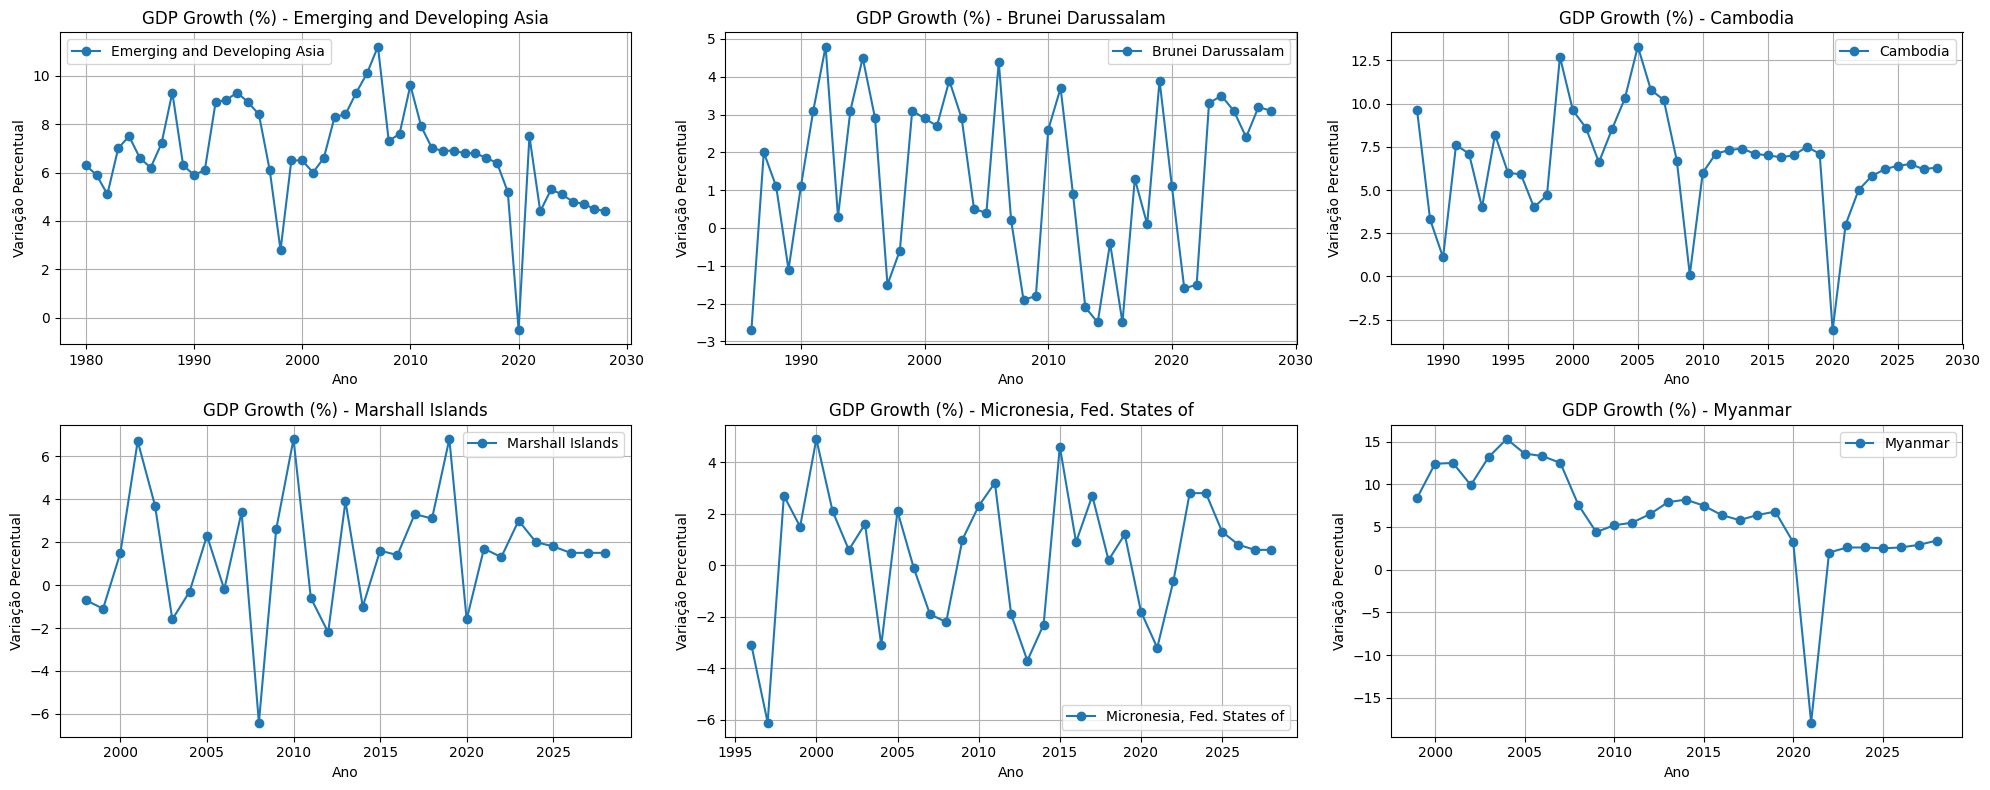

In [415]:
# Plotando o gráfico temporal das regiões "Emerging and Developing Asia", "Brunei Darussalam", "Cambodia", "Marshall Islands", "Micronesia, Fed. States of", "Myanmar":
regiao = ["Emerging and Developing Asia", "Brunei Darussalam", "Cambodia", "Marshall Islands", "Micronesia, Fed. States of", "Myanmar"]
fig, axs = plt.subplots(2, 3, figsize=(20, 8))

for i, regiao in enumerate(regiao):
    row = i // 3
    col = i % 3

    axs[row, col].plot(df_emerging_asia.index, df_emerging_asia[regiao], marker='o', linestyle='-', label=regiao)
    axs[row, col].set_title(f"GDP Growth (%) - {regiao}")
    axs[row, col].set_xlabel("Ano")
    axs[row, col].set_ylabel("Variação Percentual")
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

In [416]:
# Preenchendo os valores vazios de "Brunei Darussalam", "Cambodia" e "Micronesia, Fed. States of" com os valores de "Emerging and Developing Asia":
df_emerging_asia["Brunei Darussalam"].fillna(df_emerging_asia["Emerging and Developing Asia"], inplace=True)
df_emerging_asia["Cambodia"].fillna(df_emerging_asia["Emerging and Developing Asia"], inplace=True)
df_emerging_asia["Micronesia, Fed. States of"].fillna(df_emerging_asia["Emerging and Developing Asia"], inplace=True)

print(df_emerging_asia[["Brunei Darussalam", "Cambodia", "Micronesia, Fed. States of"]])

      Brunei Darussalam  Cambodia  Micronesia, Fed. States of
Year                                                         
1980                6.3       6.3                         6.3
1981                5.9       5.9                         5.9
1982                5.1       5.1                         5.1
1983                7.0       7.0                         7.0
1984                7.5       7.5                         7.5
1985                6.6       6.6                         6.6
1986               -2.7       6.2                         6.2
1987                2.0       7.2                         7.2
1988                1.1       9.6                         9.3
1989               -1.1       3.3                         6.3
1990                1.1       1.1                         5.9
1991                3.1       7.6                         6.1
1992                4.8       7.1                         8.9
1993                0.3       4.0                         9.0
1994    

In [417]:
# Substituindo os valores nulos de "Marshall Islands", "Myanmar", "Nauru", "Palau", "Timor-Leste" e "Tuvalu" por sua mediana:
df_emerging_asia["Marshall Islands"].fillna(df_emerging_asia["Marshall Islands"].median(), inplace=True)
df_emerging_asia["Myanmar"].fillna(df_emerging_asia["Myanmar"].median(), inplace=True)
df_emerging_asia["Nauru"].fillna(df_emerging_asia["Nauru"].median(), inplace=True)
df_emerging_asia["Palau"].fillna(df_emerging_asia["Palau"].median(), inplace=True)
df_emerging_asia["Timor-Leste"].fillna(df_emerging_asia["Timor-Leste"].median(), inplace=True)
df_emerging_asia["Tuvalu"].fillna(df_emerging_asia["Tuvalu"].median(), inplace=True)

print(df_emerging_asia[["Marshall Islands", "Myanmar", "Nauru", "Palau", "Timor-Leste", "Tuvalu"]])


      Marshall Islands  Myanmar  Nauru  Palau  Timor-Leste  Tuvalu
Year                                                              
1980               1.5     6.45    2.4   2.55          3.0     2.2
1981               1.5     6.45    2.4   2.55          3.0     2.2
1982               1.5     6.45    2.4   2.55          3.0     2.2
1983               1.5     6.45    2.4   2.55          3.0     2.2
1984               1.5     6.45    2.4   2.55          3.0     2.2
1985               1.5     6.45    2.4   2.55          3.0     2.2
1986               1.5     6.45    2.4   2.55          3.0     2.2
1987               1.5     6.45    2.4   2.55          3.0     2.2
1988               1.5     6.45    2.4   2.55          3.0     2.2
1989               1.5     6.45    2.4   2.55          3.0     2.2
1990               1.5     6.45    2.4   2.55          3.0     2.2
1991               1.5     6.45    2.4   2.55          3.0     2.2
1992               1.5     6.45    2.4   2.55          3.0    

In [418]:
# Checando se ainda há valores nulos no grupo "Emerging Asia":
print(df_emerging_asia[["Emerging and Developing Asia", "Bangladesh", "Brunei Darussalam", "Cambodia", "Marshall Islands", "Micronesia, Fed. States of", "Myanmar", "Nauru", "Palau", "Timor-Leste", "Tuvalu"]].isnull().sum())
print(df_emerging_asia[["Emerging and Developing Asia", "Bangladesh", "Brunei Darussalam", "Cambodia", "Marshall Islands", "Micronesia, Fed. States of", "Myanmar", "Nauru", "Palau", "Timor-Leste", "Tuvalu"]].isnull().sum(axis=1))

Emerging and Developing Asia    0
Bangladesh                      0
Brunei Darussalam               0
Cambodia                        0
Marshall Islands                0
Micronesia, Fed. States of      0
Myanmar                         0
Nauru                           0
Palau                           0
Timor-Leste                     0
Tuvalu                          0
dtype: int64
Year
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
2025    0
2026    0
2027    0
2028    0
dtype: int64


In [419]:
# Criando um novo df para os países "emergentes da europa":
df_emerging_europe = df_region.copy()

In [420]:
# Separando os "emergentes da europa com valores nulos em um subgrupo:
emerging_europe_com_nulos = df_emerging_europe[["Emerging and Developing Europe", "Belarus", "Bosnia and Herzegovina", "Kosovo", "Moldova", "Montenegro", "North Macedonia ", "Russian Federation", "Serbia", "Ukraine"]].isnull().any()
qtd_de_nulos = df_emerging_europe[["Emerging and Developing Europe", "Belarus", "Bosnia and Herzegovina", "Kosovo", "Moldova", "Montenegro", "North Macedonia ", "Russian Federation", "Serbia", "Ukraine"]].isnull().sum()

print("Emerging Europe sem dados:")
print(qtd_de_nulos)

Emerging Europe sem dados:
Emerging and Developing Europe     0
Belarus                            2
Bosnia and Herzegovina            15
Kosovo                            21
Moldova                           11
Montenegro                        21
North Macedonia                   13
Russian Federation                11
Serbia                            18
Ukraine                           17
dtype: int64


In [421]:
# Preenchendo o valor nulo de "Belarus" com a média de seus outros valores:
media_belarus = df_emerging_europe["Belarus"].mean()
df_emerging_europe["Belarus"].fillna(media_belarus, inplace=True)

print(df_emerging_europe['Belarus'])

Year
1980     2.180851
1981     2.180851
1982     4.000000
1983     4.300000
1984     3.000000
1985     1.700000
1986     3.600000
1987     2.800000
1988     5.300000
1989     3.000000
1990    -2.300000
1991    -1.200000
1992    -9.600000
1993    -7.600000
1994   -11.700000
1995   -11.100000
1996     2.800000
1997    11.400000
1998     8.400000
1999     3.400000
2000     5.800000
2001     4.700000
2002     5.000000
2003     7.000000
2004    11.400000
2005     9.500000
2006    10.000000
2007     8.600000
2008    10.200000
2009     0.200000
2010     7.800000
2011     5.300000
2012     1.600000
2013     1.000000
2014     1.700000
2015    -3.800000
2016    -2.500000
2017     2.500000
2018     3.100000
2019     1.400000
2020    -0.700000
2021     2.300000
2022    -4.700000
2023     0.700000
2024     1.200000
2025     1.000000
2026     0.700000
2027     0.600000
2028     0.700000
Name: Belarus, dtype: float64


IndexError: index 2 is out of bounds for axis 0 with size 2

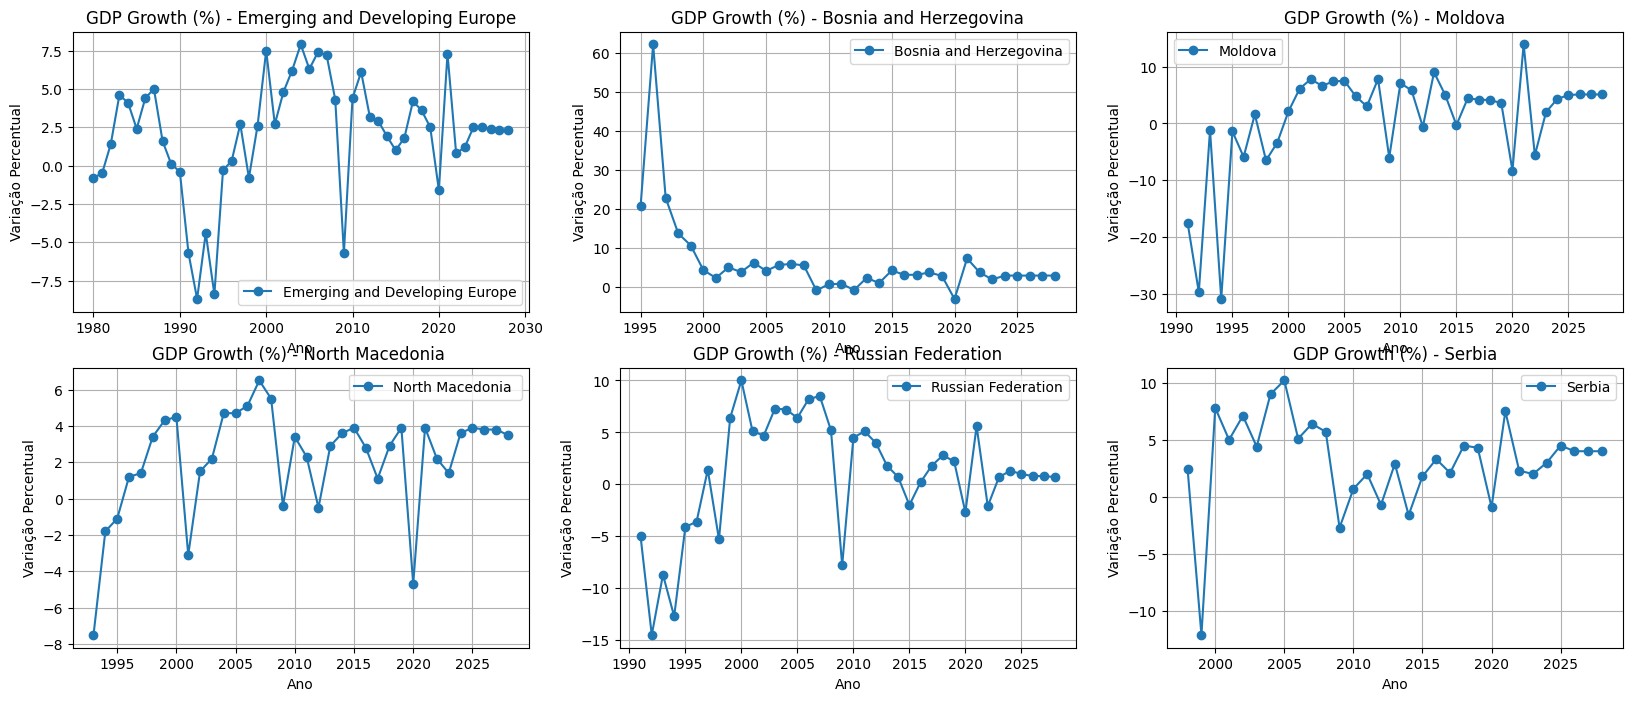

In [422]:
# Plotando o gráfico temporal das regiões "Emerging and Developing Europe", "Bosnia and Herzegovina", "Moldova", "North Macedonia ", "Russian Federation", "Serbia" e "Ukraine":
regiao = ["Emerging and Developing Europe", "Bosnia and Herzegovina", "Moldova", "North Macedonia ", "Russian Federation", "Serbia", "Ukraine"]
fig, axs = plt.subplots(2, 3, figsize=(20, 8))

for i, regiao in enumerate(regiao):
    row = i // 3
    col = i % 3

    axs[row, col].plot(df_emerging_asia.index, df_emerging_asia[regiao], marker='o', linestyle='-', label=regiao)
    axs[row, col].set_title(f"GDP Growth (%) - {regiao}")
    axs[row, col].set_xlabel("Ano")
    axs[row, col].set_ylabel("Variação Percentual")
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Preenchendo os valores vazios de "Moldova", "North Macedonia", "Russian Federation", "Serbia" e "Ukraine" com os valores de "Emerging and Developing Europe":
df_emerging_europe["Moldova"].fillna(df_emerging_europe["Emerging and Developing Europe"], inplace=True)
df_emerging_europe["North Macedonia "].fillna(df_emerging_europe["Emerging and Developing Europe"], inplace=True)
df_emerging_europe["Russian Federation"].fillna(df_emerging_europe["Emerging and Developing Europe"], inplace=True)
df_emerging_europe["Serbia"].fillna(df_emerging_europe["Emerging and Developing Europe"], inplace=True)
df_emerging_europe["Ukraine"].fillna(df_emerging_europe["Emerging and Developing Europe"], inplace=True)

print(df_emerging_europe[["Emerging and Developing Europe", "Moldova", "North Macedonia ", "Russian Federation", "Serbia", "Ukraine"]])

      Emerging and Developing Europe  Moldova  North Macedonia   \
Year                                                              
1980                            -0.8     -0.8              -0.8   
1981                            -0.5     -0.5              -0.5   
1982                             1.4      1.4               1.4   
1983                             4.6      4.6               4.6   
1984                             4.1      4.1               4.1   
1985                             2.4      2.4               2.4   
1986                             4.4      4.4               4.4   
1987                             5.0      5.0               5.0   
1988                             1.6      1.6               1.6   
1989                             0.1      0.1               0.1   
1990                            -0.4     -0.4              -0.4   
1991                            -5.7    -17.5              -5.7   
1992                            -8.7    -29.7              -8.

In [ ]:
# Substituindo os valores nulos de "Bosnia and Herzegovina", "Kosovo" e "Montenegro" pela sua mediana:
df_emerging_europe["Bosnia and Herzegovina"].fillna(df_emerging_europe["Bosnia and Herzegovina"].median(), inplace=True)
df_emerging_europe["Kosovo"].fillna(df_emerging_europe["Kosovo"].median(), inplace=True)
df_emerging_europe["Montenegro"].fillna(df_emerging_europe["Montenegro"].median(), inplace=True)

print(df_emerging_europe[["Bosnia and Herzegovina", "Kosovo", "Montenegro"]])

      Bosnia and Herzegovina  Kosovo  Montenegro
Year                                            
1980                     3.5    3.75         3.1
1981                     3.5    3.75         3.1
1982                     3.5    3.75         3.1
1983                     3.5    3.75         3.1
1984                     3.5    3.75         3.1
1985                     3.5    3.75         3.1
1986                     3.5    3.75         3.1
1987                     3.5    3.75         3.1
1988                     3.5    3.75         3.1
1989                     3.5    3.75         3.1
1990                     3.5    3.75         3.1
1991                     3.5    3.75         3.1
1992                     3.5    3.75         3.1
1993                     3.5    3.75         3.1
1994                     3.5    3.75         3.1
1995                    20.7    3.75         3.1
1996                    62.2    3.75         3.1
1997                    22.9    3.75         3.1
1998                

In [ ]:
# Checando se ainda há valores nulos no grupo "Emerging Europe":
print(df_emerging_europe[["Emerging and Developing Europe", "Belarus", "Bosnia and Herzegovina", "Kosovo", "Moldova", "Montenegro", "North Macedonia ", "Russian Federation", "Serbia", "Ukraine"]].isnull().sum())
print(df_emerging_europe[["Emerging and Developing Europe", "Belarus", "Bosnia and Herzegovina", "Kosovo", "Moldova", "Montenegro", "North Macedonia ", "Russian Federation", "Serbia", "Ukraine"]].isnull().sum(axis=1))

Emerging and Developing Europe    0
Belarus                           0
Bosnia and Herzegovina            0
Kosovo                            0
Moldova                           0
Montenegro                        0
North Macedonia                   0
Russian Federation                0
Serbia                            0
Ukraine                           0
dtype: int64
Year
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
2025    0
2026    0
2027    0
2028    0
dtype: int64


In [ ]:
# Criando um novo df para os países da "euro area":
df_euro_area = df_region.copy()

In [ ]:
# Separando os países da "euro area" com valores nulos em um subgrupo:
euro_area_com_nulos = df_euro_area[["Euro area", "Croatia", "Estonia", "Latvia", "Lithuania", "Netherlands", "Slovak Republic", "Slovenia"]].isnull().any()
qtd_de_nulos = df_euro_area[["Euro area", "Croatia", "Estonia", "Latvia", "Lithuania", "Netherlands", "Slovak Republic", "Slovenia"]].isnull().sum()

print("Euro area sem dados:")
print(qtd_de_nulos)

Euro area sem dados:
Euro area           0
Croatia            13
Estonia            14
Latvia             13
Lithuania          16
Netherlands         1
Slovak Republic    14
Slovenia           13
dtype: int64


In [ ]:
# Preenchendo o valor nulo de "Netherlands" com a média de seus outros valores:
media_netherlands = df_euro_area["Netherlands"].mean()
df_euro_area["Netherlands"].fillna(media_netherlands, inplace=True)

print(df_euro_area['Netherlands'])

Year
1980    2.041667
1981   -0.500000
1982   -1.300000
1983    1.800000
1984    3.100000
1985    2.700000
1986    3.100000
1987    1.900000
1988    4.600000
1989    4.500000
1990    4.200000
1991    2.500000
1992    1.600000
1993    1.300000
1994    3.000000
1995    2.800000
1996    3.500000
1997    4.300000
1998    4.700000
1999    5.000000
2000    4.200000
2001    2.300000
2002    0.200000
2003    0.200000
2004    2.000000
2005    2.000000
2006    3.500000
2007    3.800000
2008    2.200000
2009   -3.700000
2010    1.300000
2011    1.500000
2012   -1.000000
2013   -0.100000
2014    1.400000
2015    2.000000
2016    2.200000
2017    2.900000
2018    2.400000
2019    2.000000
2020   -3.900000
2021    4.900000
2022    4.500000
2023    1.000000
2024    1.200000
2025    1.500000
2026    1.600000
2027    1.500000
2028    1.600000
Name: Netherlands, dtype: float64


IndexError: index 2 is out of bounds for axis 0 with size 2

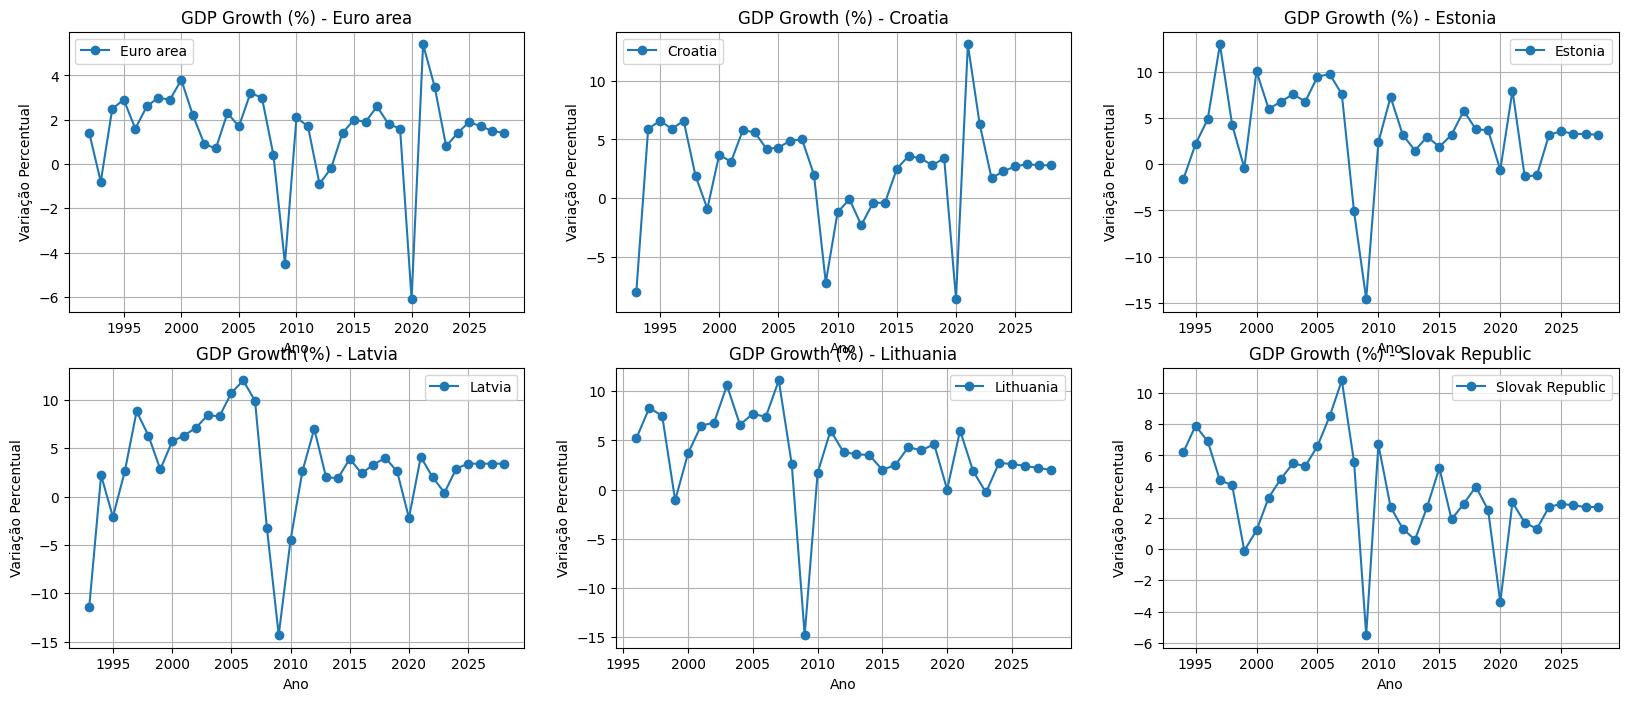

In [ ]:
# Plotando o gráfico temporal das regiões "Euro area", "Croatia", "Estonia", "Latvia", "Lithuania", "Slovak Republic", "Slovenia":

regiao = ["Euro area", "Croatia", "Estonia", "Latvia", "Lithuania", "Slovak Republic", "Slovenia"]

fig, axs = plt.subplots(2, 3, figsize=(20, 8))

for i, regiao in enumerate(regiao):
    row = i // 3
    col = i % 3

    axs[row, col].plot(df_emerging_asia.index, df_emerging_asia[regiao], marker='o', linestyle='-', label=regiao)
    axs[row, col].set_title(f"GDP Growth (%) - {regiao}")
    axs[row, col].set_xlabel("Ano")
    axs[row, col].set_ylabel("Variação Percentual")
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Preenchendo os valores vazios de "Croatia", "Estonia", "Latvia", "Lithuania", "Slovak Republic", "Slovenia" com os valores de "Euro area":
df_euro_area["Croatia"].fillna(df_euro_area["Euro area"], inplace=True)
df_euro_area["Estonia"].fillna(df_euro_area["Euro area"], inplace=True)
df_euro_area["Latvia"].fillna(df_euro_area["Euro area"], inplace=True)
df_euro_area["Lithuania"].fillna(df_euro_area["Euro area"], inplace=True)
df_euro_area["Slovak Republic"].fillna(df_euro_area["Euro area"], inplace=True)
df_euro_area["Slovenia"].fillna(df_euro_area["Euro area"], inplace=True)

print(df_euro_area[["Croatia", "Estonia", "Latvia", "Lithuania", "Slovak Republic", "Slovenia"]])


      Croatia  Estonia  Latvia  Lithuania  Slovak Republic  Slovenia
Year                                                                
1980      1.8      1.8     1.8        1.8              1.8       1.8
1981      0.1      0.1     0.1        0.1              0.1       0.1
1982      0.6      0.6     0.6        0.6              0.6       0.6
1983      1.7      1.7     1.7        1.7              1.7       1.7
1984      2.5      2.5     2.5        2.5              2.5       2.5
1985      2.2      2.2     2.2        2.2              2.2       2.2
1986      2.7      2.7     2.7        2.7              2.7       2.7
1987      2.6      2.6     2.6        2.6              2.6       2.6
1988      3.8      3.8     3.8        3.8              3.8       3.8
1989      3.6      3.6     3.6        3.6              3.6       3.6
1990      2.7      2.7     2.7        2.7              2.7       2.7
1991      1.4      1.4     1.4        1.4              1.4       1.4
1992      1.4      1.4     1.4    

In [ ]:
# Checando se ainda há valores nulos no grupo "Euro area":
print(df_euro_area[["Euro area", "Croatia", "Estonia", "Latvia", "Lithuania", "Netherlands", "Slovak Republic", "Slovenia"]].isnull().sum())
print(df_euro_area[["Euro area", "Croatia", "Estonia", "Latvia", "Lithuania", "Netherlands", "Slovak Republic", "Slovenia"]].isnull().sum(axis=1))

Euro area          0
Croatia            0
Estonia            0
Latvia             0
Lithuania          0
Netherlands        0
Slovak Republic    0
Slovenia           0
dtype: int64
Year
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
2025    0
2026    0
2027    0
2028    0
dtype: int64


In [ ]:
# Criando um novo df para os países "latin and caribeean":
df_latin = df_region.copy()

In [ ]:
# Separando os países "latin and carebeean" com valores nulos em um subgrupo:
latin_com_nulos = df_latin[["Latin America and the Caribbean", "Aruba", "Venezuela"]].isnull().any()
qtd_de_nulos = df_latin[["Latin America and the Caribbean", "Aruba", "Venezuela"]].isnull().sum()

print("Latin and Caribbean sem dados:")
print(qtd_de_nulos)

Latin and Caribbean sem dados:
Latin America and the Caribbean    0
Aruba                              7
Venezuela                          4
dtype: int64


In [ ]:
# Preenchendo o valor nulo de "Venezuela" com a média de seus outros valores:
media_venezuela = df_latin["Venezuela"].mean()
df_latin["Venezuela"].fillna(media_venezuela, inplace=True)

print(df_latin['Venezuela'])

Year
1980    -4.900000
1981    -1.300000
1982     2.600000
1983    -9.900000
1984     5.200000
1985     0.900000
1986     6.100000
1987     4.800000
1988     6.500000
1989   -13.900000
1990     6.500000
1991     9.700000
1992     6.100000
1993     0.300000
1994    -2.300000
1995     4.000000
1996    -0.200000
1997     6.400000
1998     0.300000
1999    -6.000000
2000     3.700000
2001     3.400000
2002    -8.900000
2003    -7.800000
2004    18.300000
2005    10.300000
2006     9.900000
2007     8.800000
2008     5.300000
2009    -3.200000
2010    -1.500000
2011     4.200000
2012     5.600000
2013     1.300000
2014    -3.900000
2015    -6.200000
2016   -17.000000
2017   -15.700000
2018   -19.700000
2019   -27.700000
2020   -30.000000
2021     0.500000
2022     8.000000
2023     5.000000
2024     4.500000
2025    -0.708889
2026    -0.708889
2027    -0.708889
2028    -0.708889
Name: Venezuela, dtype: float64


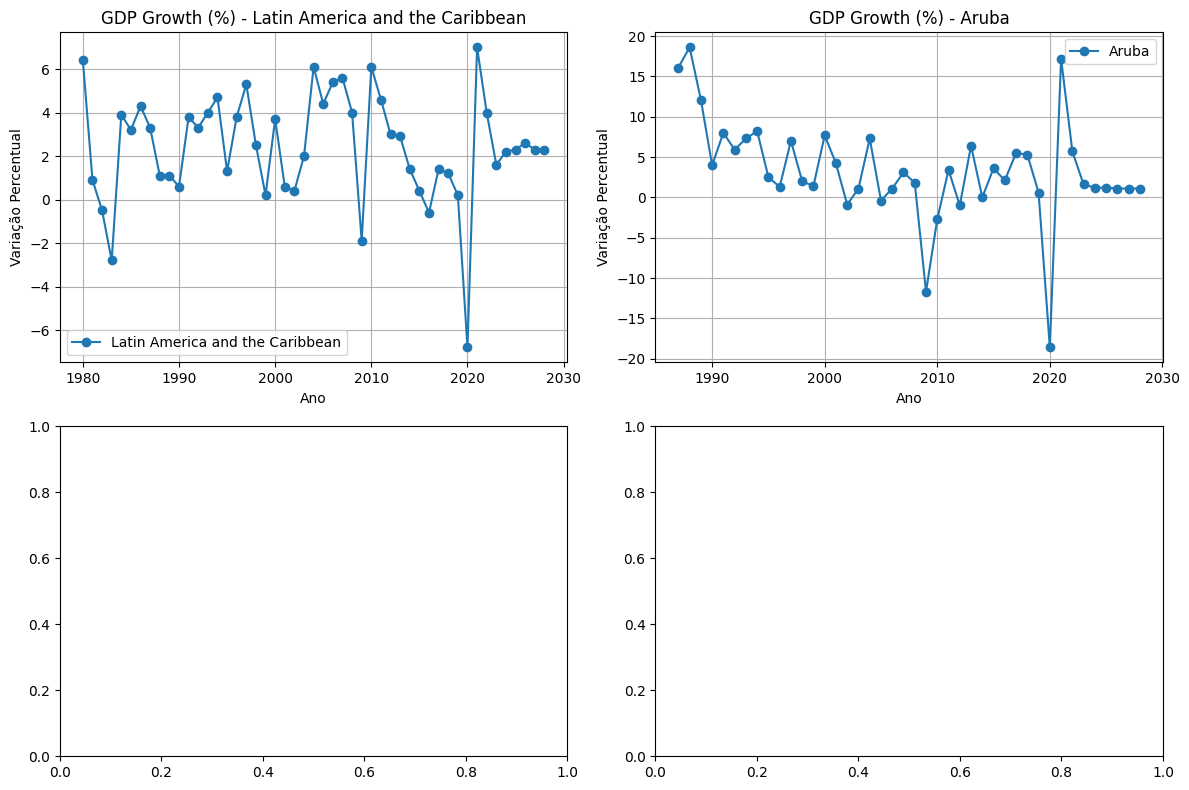

In [ ]:
# Plotando o gráfico temporal das regiões "Latin America and the Caribbean" e "Aruba":
regiao = ["Latin America and the Caribbean", "Aruba"]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, regiao in enumerate(regiao):
    row = i // 2
    col = i % 2

    axs[row, col].plot(df_emerging_asia.index, df_emerging_asia[regiao], marker='o', linestyle='-', label=regiao)
    axs[row, col].set_title(f"GDP Growth (%) - {regiao}")
    axs[row, col].set_xlabel("Ano")
    axs[row, col].set_ylabel("Variação Percentual")
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Preenchendo os valores vazios de "Arruba" com os valores de "Latin America and the Caribbean":
df_latin["Aruba"].fillna(df_latin["Latin America and the Caribbean"], inplace=True)

print(df_latin["Aruba"])

Year
1980     6.4
1981     0.9
1982    -0.5
1983    -2.8
1984     3.9
1985     3.2
1986     4.3
1987    16.1
1988    18.6
1989    12.1
1990     4.0
1991     8.0
1992     5.9
1993     7.3
1994     8.2
1995     2.5
1996     1.3
1997     7.0
1998     2.0
1999     1.4
2000     7.7
2001     4.2
2002    -0.9
2003     1.1
2004     7.3
2005    -0.4
2006     1.1
2007     3.1
2008     1.8
2009   -11.7
2010    -2.7
2011     3.4
2012    -1.0
2013     6.4
2014     0.0
2015     3.6
2016     2.1
2017     5.5
2018     5.3
2019     0.6
2020   -18.6
2021    17.2
2022     5.7
2023     1.6
2024     1.2
2025     1.2
2026     1.1
2027     1.1
2028     1.1
Name: Aruba, dtype: float64


In [ ]:
# Checando se ainda há valores nulos no grupo "Latin America and the Caribbean":
print(df_latin[["Latin America and the Caribbean", "Aruba", "Venezuela"]].isnull().sum())
print(df_latin[["Latin America and the Caribbean", "Aruba", "Venezuela"]].isnull().sum(axis=1))

Latin America and the Caribbean    0
Aruba                              0
Venezuela                          0
dtype: int64
Year
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
2025    0
2026    0
2027    0
2028    0
dtype: int64


In [ ]:
# Criando um novo df para os países do "middle east and central asia":
df_middle = df_region.copy()

In [ ]:

# Separando os países do "middle east and central asia" com valores nulos em um subgrupo:
midlle_asia_com_nulos = df_middle[["Middle East and Central Asia", "Afghanistan", "Armenia", "Azerbaijan", "Djibouti", "Georgia", "Iraq", "Kazakhstan", "Kyrgyz Republic", "Lebanon", "Mauritania", "Somalia", "Syria", "Tajikistan", "Turkmenistan", "Uzbekistan", "West Bank and Gaza", "Yemen"]].isnull().any()
qtd_de_nulos = df_middle[["Middle East and Central Asia", "Afghanistan", "Armenia", "Azerbaijan", "Djibouti", "Georgia", "Iraq", "Kazakhstan", "Kyrgyz Republic", "Lebanon", "Mauritania", "Somalia", "Syria", "Tajikistan", "Turkmenistan", "Uzbekistan", "West Bank and Gaza", "Yemen"]].isnull().sum()

print("Middle East and Central Asia sem dados:")
print(qtd_de_nulos)

Middle East and Central Asia sem dados:
Middle East and Central Asia     0
Afghanistan                     31
Armenia                         13
Azerbaijan                      13
Djibouti                        11
Georgia                         11
Iraq                            19
Kazakhstan                      13
Kyrgyz Republic                 13
Lebanon                          8
Mauritania                      11
Somalia                         32
Syria                           18
Tajikistan                      13
Turkmenistan                    13
Uzbekistan                      12
West Bank and Gaza              15
Yemen                           11
dtype: int64


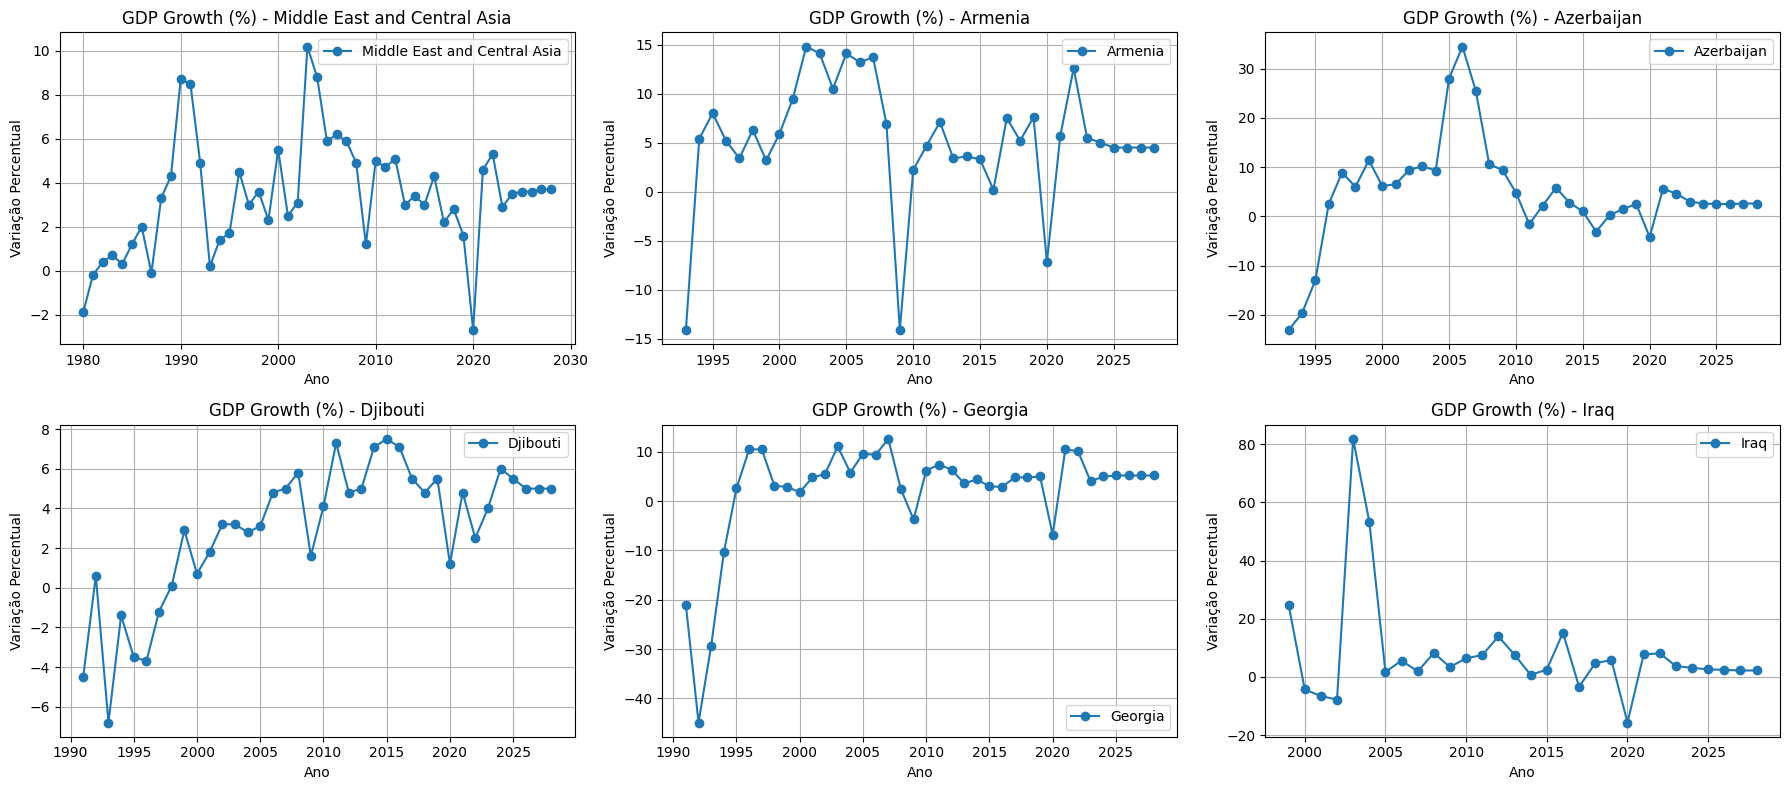

In [ ]:
# Plotando o gráfico temporal das regiões "Middle East and Central Asia", "Armenia", "Azerbaijan", "Djibouti", "Georgia", "Iraq":
regiao = ["Middle East and Central Asia", "Armenia", "Azerbaijan", "Djibouti", "Georgia", "Iraq"]

fig, axs = plt.subplots(2, 3, figsize=(18, 8))

for i, regiao in enumerate(regiao):
    row = i // 3
    col = i % 3

    axs[row, col].plot(df_emerging_asia.index, df_emerging_asia[regiao], marker='o', linestyle='-', label=regiao)
    axs[row, col].set_title(f"GDP Growth (%) - {regiao}")
    axs[row, col].set_xlabel("Ano")
    axs[row, col].set_ylabel("Variação Percentual")
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

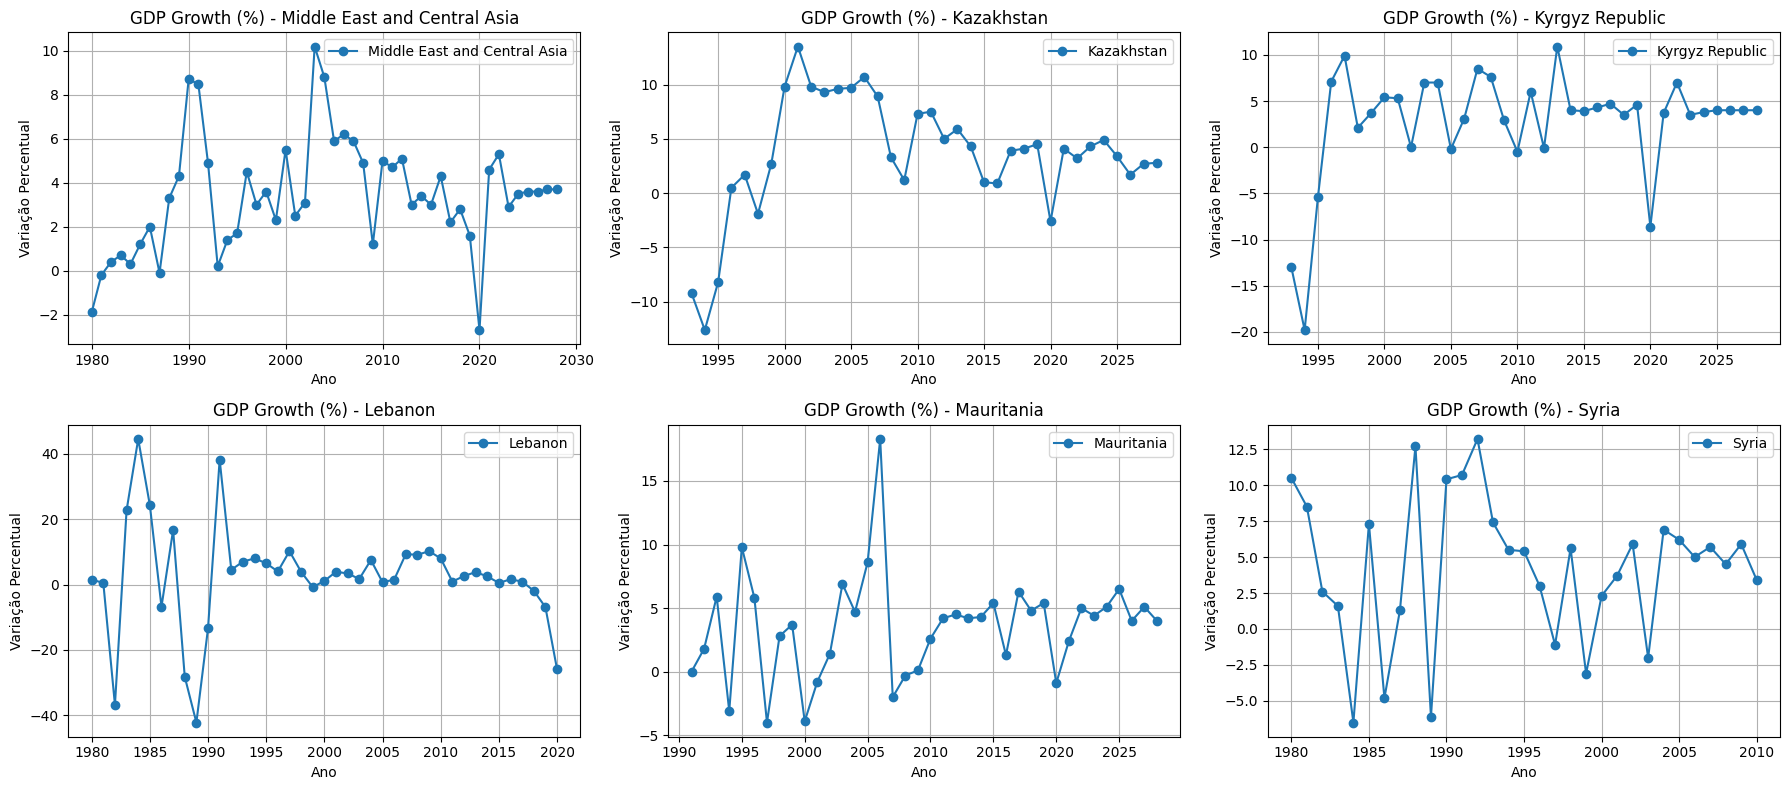

In [ ]:
# Plotando o gráfico temporal das regiões "Middle East and Central Asia", "Kazakhstan", "Kyrgyz Republic", "Lebanon", "Mauritania", "Syria":
regiao = ["Middle East and Central Asia", "Kazakhstan", "Kyrgyz Republic", "Lebanon", "Mauritania", "Syria"]

fig, axs = plt.subplots(2, 3, figsize=(18, 8))

for i, regiao in enumerate(regiao):
    row = i // 3
    col = i % 3

    axs[row, col].plot(df_emerging_asia.index, df_emerging_asia[regiao], marker='o', linestyle='-', label=regiao)
    axs[row, col].set_title(f"GDP Growth (%) - {regiao}")
    axs[row, col].set_xlabel("Ano")
    axs[row, col].set_ylabel("Variação Percentual")
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

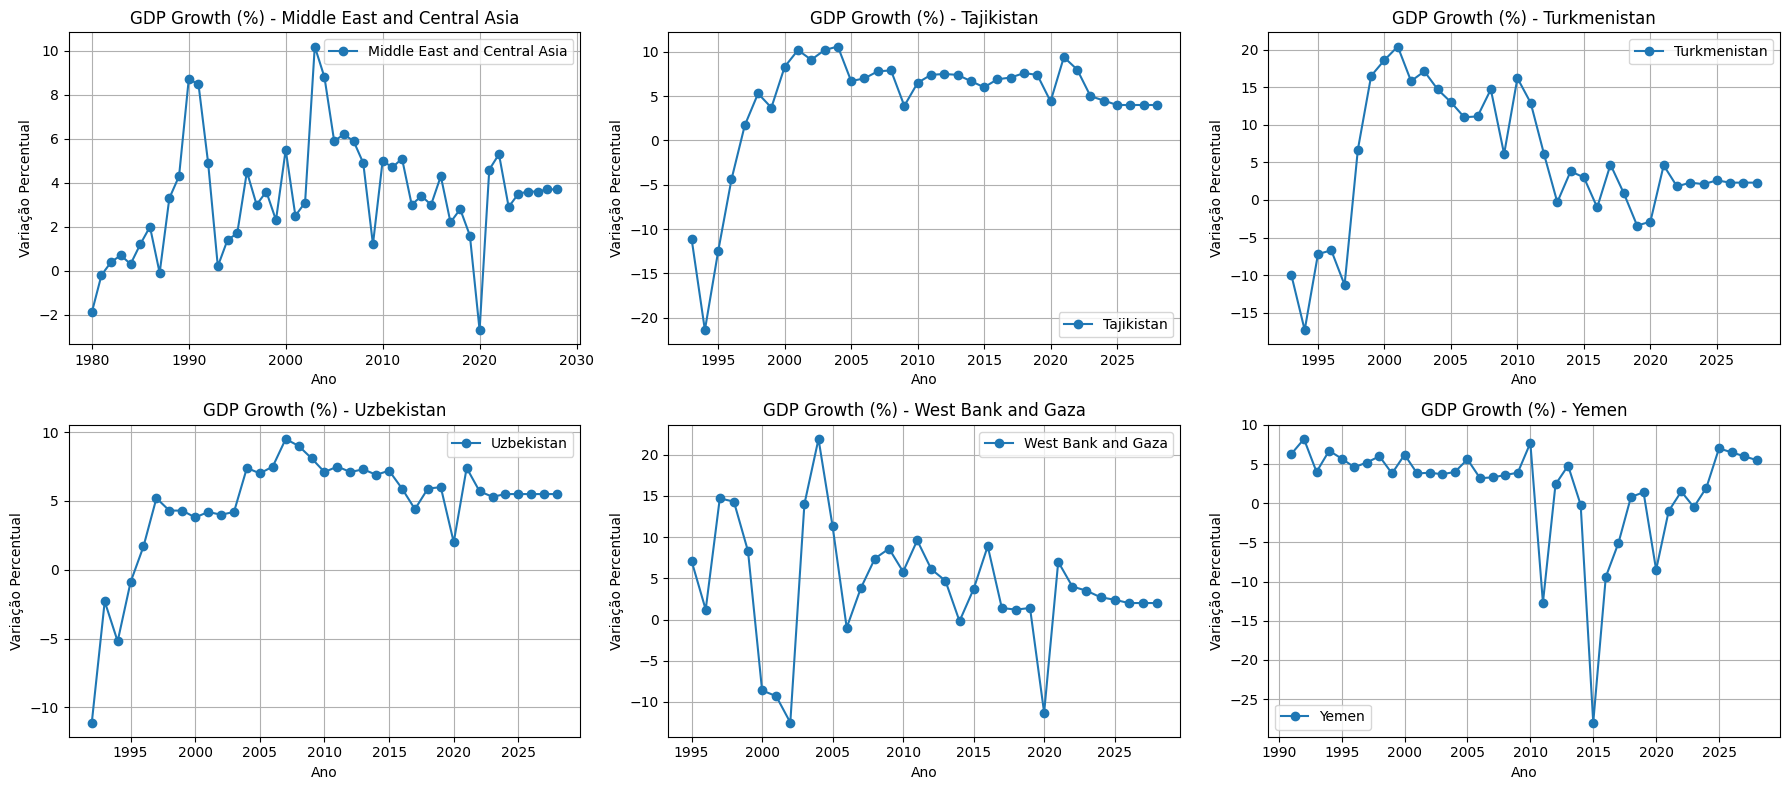

In [ ]:
# Plotando o gráfico temporal das regiões "Middle East and Central Asia", "Tajikistan", "Turkmenistan", "Uzbekistan", "West Bank and Gaza", "Yemen":
regiao = ["Middle East and Central Asia", "Tajikistan", "Turkmenistan", "Uzbekistan", "West Bank and Gaza", "Yemen"]

fig, axs = plt.subplots(2, 3, figsize=(18, 8))

for i, regiao in enumerate(regiao):
    row = i // 3
    col = i % 3

    axs[row, col].plot(df_emerging_asia.index, df_emerging_asia[regiao], marker='o', linestyle='-', label=regiao)
    axs[row, col].set_title(f"GDP Growth (%) - {regiao}")
    axs[row, col].set_xlabel("Ano")
    axs[row, col].set_ylabel("Variação Percentual")
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Preenchendo os valores vazios de "Armenia", "Djibouti", "Georgia", "Kazakhstan", "Kyrgyz Republic" e "Syria" com os valores de "Middle East and Central Asia":
df_middle["Armenia"].fillna(df_middle["Middle East and Central Asia"], inplace=True)
df_middle["Djibouti"].fillna(df_middle["Middle East and Central Asia"], inplace=True)
df_middle["Georgia"].fillna(df_middle["Middle East and Central Asia"], inplace=True)
df_middle["Kazakhstan"].fillna(df_middle["Middle East and Central Asia"], inplace=True)
df_middle["Kyrgyz Republic"].fillna(df_middle["Middle East and Central Asia"], inplace=True)
df_middle["Syria"].fillna(df_middle["Middle East and Central Asia"], inplace=True)


print(df_middle[["Armenia", "Djibouti", "Georgia", "Kazakhstan", "Kyrgyz Republic", "Syria"]])

      Armenia  Djibouti  Georgia  Kazakhstan  Kyrgyz Republic  Syria
Year                                                                
1980     -1.9      -1.9     -1.9        -1.9             -1.9   10.5
1981     -0.2      -0.2     -0.2        -0.2             -0.2    8.5
1982      0.4       0.4      0.4         0.4              0.4    2.6
1983      0.7       0.7      0.7         0.7              0.7    1.6
1984      0.3       0.3      0.3         0.3              0.3   -6.5
1985      1.2       1.2      1.2         1.2              1.2    7.3
1986      2.0       2.0      2.0         2.0              2.0   -4.8
1987     -0.1      -0.1     -0.1        -0.1             -0.1    1.3
1988      3.3       3.3      3.3         3.3              3.3   12.7
1989      4.3       4.3      4.3         4.3              4.3   -6.1
1990      8.7       8.7      8.7         8.7              8.7   10.4
1991      8.5      -4.5    -21.1         8.5              8.5   10.7
1992      4.9       0.6    -44.9  

In [ ]:
# Substituindo os valores nulos de "Afghanistan", "Somalia", "Azerbaijan", "Iraq", "Lebanon", "Mauritania", "Tajikistan", "Turkmenistan", "Uzbekistan", "West Bank and Gaza" e "Yemen" por sua mediana:
df_middle["Afghanistan"].fillna(df_middle["Afghanistan"].median(), inplace=True)
df_middle["Somalia"].fillna(df_middle["Somalia"].median(), inplace=True)
df_middle["Azerbaijan"].fillna(df_middle["Azerbaijan"].median(), inplace=True)
df_middle["Iraq"].fillna(df_middle["Iraq"].median(), inplace=True)
df_middle["Lebanon"].fillna(df_middle["Lebanon"].median(), inplace=True)
df_middle["Mauritania"].fillna(df_middle["Mauritania"].median(), inplace=True)
df_middle["Tajikistan"].fillna(df_middle["Tajikistan"].median(), inplace=True)
df_middle["Turkmenistan"].fillna(df_middle["Turkmenistan"].median(), inplace=True)
df_middle["Uzbekistan"].fillna(df_middle["Uzbekistan"].median(), inplace=True)
df_middle["West Bank and Gaza"].fillna(df_middle["West Bank and Gaza"].median(), inplace=True)
df_middle["Yemen"].fillna(df_middle["Yemen"].median(), inplace=True)

print(df_middle[["Afghanistan", "Somalia", "Azerbaijan", "Iraq", "Lebanon", "Mauritania", "Tajikistan", "Turkmenistan", "Uzbekistan", "West Bank and Gaza", "Yemen"]])

      Afghanistan  Somalia  Azerbaijan   Iraq  Lebanon  Mauritania  \
Year                                                                 
1980         4.65      3.7         2.9   3.55      1.5         4.2   
1981         4.65      3.7         2.9   3.55      0.5         4.2   
1982         4.65      3.7         2.9   3.55    -36.8         4.2   
1983         4.65      3.7         2.9   3.55     22.7         4.2   
1984         4.65      3.7         2.9   3.55     44.5         4.2   
1985         4.65      3.7         2.9   3.55     24.3         4.2   
1986         4.65      3.7         2.9   3.55     -6.8         4.2   
1987         4.65      3.7         2.9   3.55     16.7         4.2   
1988         4.65      3.7         2.9   3.55    -28.2         4.2   
1989         4.65      3.7         2.9   3.55    -42.2         4.2   
1990         4.65      3.7         2.9   3.55    -13.4         4.2   
1991         4.65      3.7         2.9   3.55     38.2         0.0   
1992         4.65   

In [ ]:
# Checando se ainda há valores nulos no grupo "Middle East and Central Asia":
print(df_middle[["Middle East and Central Asia", "Afghanistan", "Armenia", "Azerbaijan", "Djibouti", "Georgia", "Iraq", "Kazakhstan", "Kyrgyz Republic", "Lebanon", "Mauritania", "Somalia", "Syria", "Tajikistan", "Turkmenistan", "Uzbekistan", "West Bank and Gaza", "Yemen"]].isnull().sum())
print(df_middle[["Middle East and Central Asia", "Afghanistan", "Armenia", "Azerbaijan", "Djibouti", "Georgia", "Iraq", "Kazakhstan", "Kyrgyz Republic", "Lebanon", "Mauritania", "Somalia", "Syria", "Tajikistan", "Turkmenistan", "Uzbekistan", "West Bank and Gaza", "Yemen"]].isnull().sum(axis=1))

Middle East and Central Asia    0
Afghanistan                     0
Armenia                         0
Azerbaijan                      0
Djibouti                        0
Georgia                         0
Iraq                            0
Kazakhstan                      0
Kyrgyz Republic                 0
Lebanon                         0
Mauritania                      0
Somalia                         0
Syria                           0
Tajikistan                      0
Turkmenistan                    0
Uzbekistan                      0
West Bank and Gaza              0
Yemen                           0
dtype: int64
Year
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0


In [ ]:
# Criando um novo df para os países do grupo "Others Advanced":
df_other = df_region.copy()

In [ ]:
# Separando os países do grupo "Others Advanced" com valores nulos em um subgrupo:
other_com_nulos = df_other[["Other advanced economies", "Andorra", "Czech Republic", "Macao SAR", "Puerto Rico", "San Marino"]].isnull().any()
qtd_de_nulos = df_other[["Other advanced economies", "Andorra", "Czech Republic", "Macao SAR", "Puerto Rico", "San Marino"]].isnull().sum()

print("Other Economies sem dados:")
print(qtd_de_nulos)

Other Economies sem dados:
Other advanced economies     0
Andorra                     21
Czech Republic              16
Macao SAR                   22
Puerto Rico                  1
San Marino                  18
dtype: int64


In [ ]:
# Preenchendo o valor nulo de "Puerto Rico" com a média de seus outros valores:
media_puertorico = df_other["Puerto Rico"].mean()
df_other["Puerto Rico"].fillna(media_puertorico, inplace=True)

print(df_other['Puerto Rico'])


Year
1980    1.504167
1981    1.100000
1982   -3.000000
1983    0.500000
1984    7.300000
1985    2.100000
1986    8.200000
1987    4.900000
1988    6.500000
1989    4.900000
1990    3.800000
1991    2.300000
1992    4.600000
1993    4.600000
1994    4.200000
1995    4.500000
1996    2.300000
1997    4.900000
1998    6.500000
1999    4.400000
2000    3.300000
2001    9.500000
2002    2.200000
2003    2.300000
2004    2.000000
2005   -2.000000
2006   -1.400000
2007   -1.200000
2008   -1.800000
2009   -2.000000
2010   -0.400000
2011   -0.400000
2012    0.000000
2013   -0.300000
2014   -1.200000
2015   -1.000000
2016   -1.300000
2017   -2.900000
2018   -4.400000
2019    1.700000
2020   -4.400000
2021    0.200000
2022    4.800000
2023    0.400000
2024   -1.600000
2025   -1.000000
2026   -0.500000
2027   -0.500000
2028   -0.500000
Name: Puerto Rico, dtype: float64


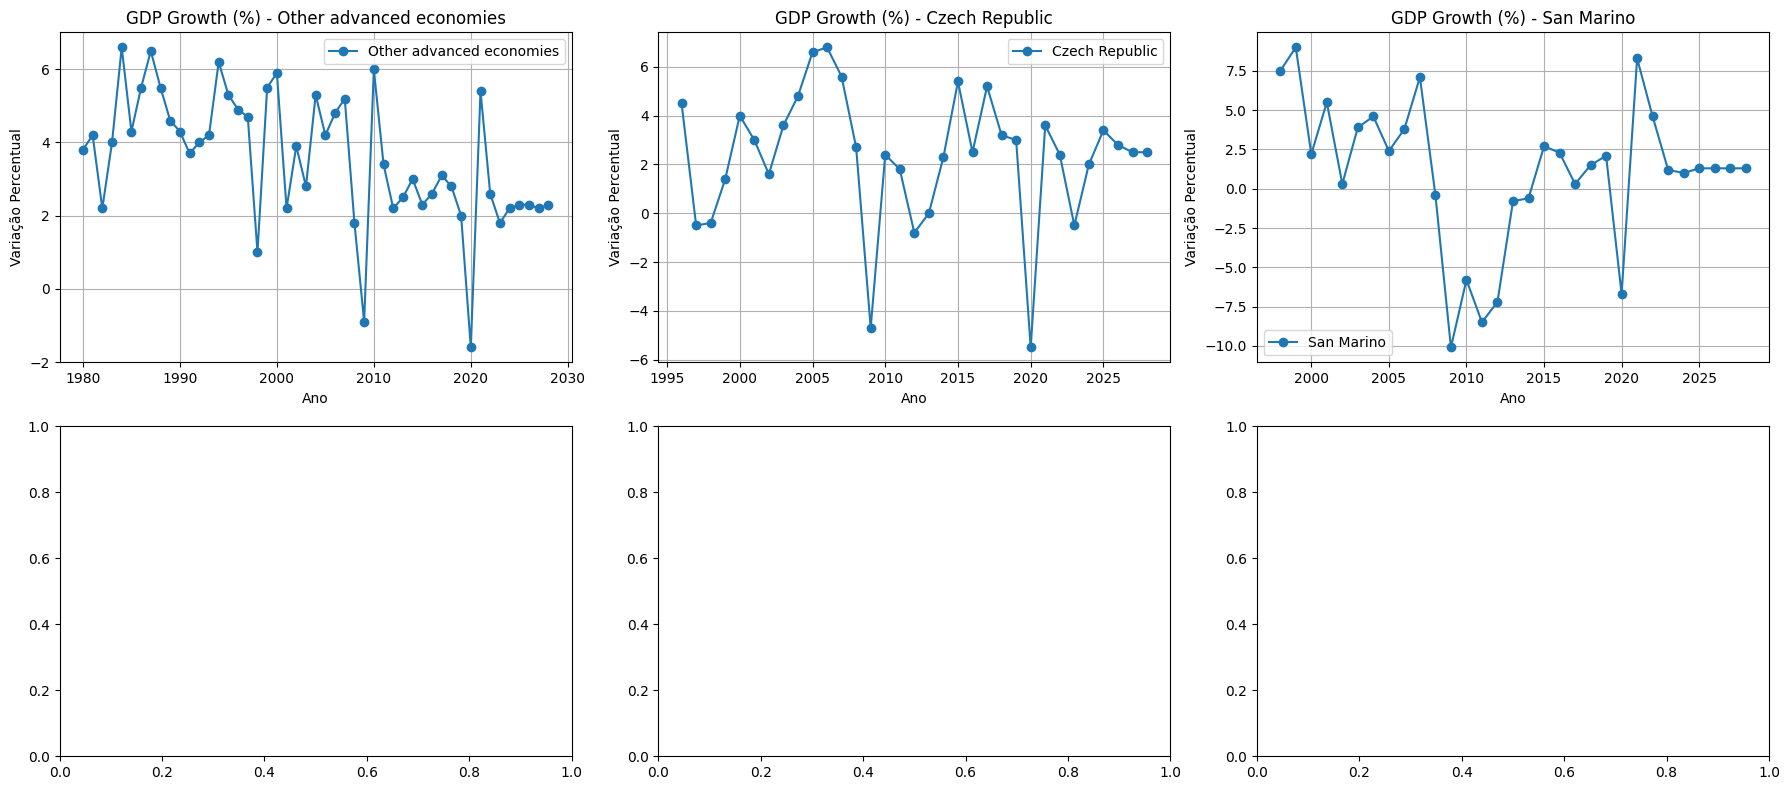

In [ ]:
# Plotando o gráfico temporal das regiões "Other advanced economies", "Czech Republic" e "San Marino":
regiao = ["Other advanced economies", "Czech Republic", "San Marino"]

fig, axs = plt.subplots(2, 3, figsize=(18, 8))

for i, regiao in enumerate(regiao):
    row = i // 3
    col = i % 3

    axs[row, col].plot(df_emerging_asia.index, df_emerging_asia[regiao], marker='o', linestyle='-', label=regiao)
    axs[row, col].set_title(f"GDP Growth (%) - {regiao}")
    axs[row, col].set_xlabel("Ano")
    axs[row, col].set_ylabel("Variação Percentual")
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Preenchendo os valores vazios de "Czech Republic" e "San Marino" com os valores de "Other advanced economies":
df_other["Czech Republic"].fillna(df_other["Other advanced economies"], inplace=True)
df_other["San Marino"].fillna(df_other["Other advanced economies"], inplace=True)

print(df_other[["Czech Republic", "San Marino"]])

      Czech Republic  San Marino
Year                            
1980             3.8         3.8
1981             4.2         4.2
1982             2.2         2.2
1983             4.0         4.0
1984             6.6         6.6
1985             4.3         4.3
1986             5.5         5.5
1987             6.5         6.5
1988             5.5         5.5
1989             4.6         4.6
1990             4.3         4.3
1991             3.7         3.7
1992             4.0         4.0
1993             4.2         4.2
1994             6.2         6.2
1995             5.3         5.3
1996             4.5         4.9
1997            -0.5         4.7
1998            -0.4         7.5
1999             1.4         9.0
2000             4.0         2.2
2001             3.0         5.5
2002             1.6         0.3
2003             3.6         3.9
2004             4.8         4.6
2005             6.6         2.4
2006             6.8         3.8
2007             5.6         7.1
2008      

In [ ]:
# Substituindo os valores nulos de "Andorra" e "Macao SAR" e "Liberia" por sua mediana:
df_other["Andorra"].fillna(df_other["Andorra"].median(), inplace=True)
df_other["Macao SAR"].fillna(df_other["Macao SAR"].median(), inplace=True)

print(df_other[["Andorra", "Macao SAR"]])


      Andorra  Macao SAR
Year                    
1980      1.5        8.6
1981      1.5        8.6
1982      1.5        8.6
1983      1.5        8.6
1984      1.5        8.6
1985      1.5        8.6
1986      1.5        8.6
1987      1.5        8.6
1988      1.5        8.6
1989      1.5        8.6
1990      1.5        8.6
1991      1.5        8.6
1992      1.5        8.6
1993      1.5        8.6
1994      1.5        8.6
1995      1.5        8.6
1996      1.5        8.6
1997      1.5        8.6
1998      1.5        8.6
1999      1.5        8.6
2000      1.5        8.6
2001      8.1        8.6
2002      4.5        8.9
2003      8.7       11.6
2004      8.1       26.6
2005      5.4        8.1
2006      4.8       13.4
2007      1.6       14.5
2008     -5.6        3.4
2009     -5.3        1.3
2010     -2.0       25.1
2011      0.0       21.6
2012     -5.0        9.2
2013     -3.5       10.8
2014      2.5       -2.0
2015      1.4      -21.5
2016      3.7       -0.7
2017      0.3       10.0


In [ ]:
# Checando se ainda há valores nulos no grupo "Other advanced economies":
print(df_other[["Other advanced economies", "Andorra", "Czech Republic", "Macao SAR", "Puerto Rico", "San Marino"]].isnull().sum())
print(df_other[["Other advanced economies", "Andorra", "Czech Republic", "Macao SAR", "Puerto Rico", "San Marino"]].isnull().sum(axis=1))

Other advanced economies    0
Andorra                     0
Czech Republic              0
Macao SAR                   0
Puerto Rico                 0
San Marino                  0
dtype: int64
Year
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
2025    0
2026    0
2027    0
2028    0
dtype: int64


In [ ]:
# Copiando o dataframe pivotado e sem os valores nulos preenchidos em um novo dataframe:
df_filled = df_pivoted.copy()

In [ ]:
# Atualizando os valores preenchidos das regiões no novo dataframe "filled":
df_filled.update(df_african)
df_filled.update(df_emerging_asia)
df_filled.update(df_emerging_europe)
df_filled.update(df_euro_area)
df_filled.update(df_latin)
df_filled.update(df_middle)
df_filled.update(df_other)

print(df_filled.head())


      Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
Year                                                                        
1980         4.65      2.7     -5.4      1.5     2.4                  8.2   
1981         4.65      5.7      3.0      1.5    -4.4                  3.8   
1982         4.65      2.9      6.4      1.5     0.0                 -0.1   
1983         4.65      1.1      5.4      1.5     4.2                  5.4   
1984         4.65      2.0      5.6      1.5     6.0                 10.2   

      Argentina  Armenia  Aruba  Australia  ...  \
Year                                        ...   
1980        0.7     -1.9    6.4        2.9  ...   
1981       -5.7     -0.2    0.9        4.1  ...   
1982       -3.1      0.4   -0.5        0.1  ...   
1983        3.7      0.7   -2.8       -0.5  ...   
1984        2.0      0.3    3.9        6.3  ...   

      Emerging and Developing Europe  \
Year                                   
1980                  

In [ ]:
# Checando se ainda há valores nulos no dataframe "filled":
print(df_filled.isnull().sum())
print(df_filled.isnull().sum(axis=1))


Afghanistan                      0
Albania                          0
Algeria                          0
Andorra                          0
Angola                           0
                                ..
Major advanced economies (G7)    0
Middle East and Central Asia     0
Other advanced economies         0
Sub-Saharan Africa               0
World                            0
Length: 228, dtype: int64
Year
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
2025    0
2026    0
2027    0
2028    0
dtype: int64


### 3.3 Dataframe - Regressão


In [ ]:
# Criando um novo dataframe para utilizar um método de regressão para preencher valores nulos:
df_regressao = df_pivoted.copy()

In [ ]:
# Aplicando a regressão para preencher valores nulos no dataframe:
paises_com_nulos = df_regressao.columns[df_regressao.isnull().any()]

for country in paises_com_nulos:
  dados_disponiveis = df_regressao[country].dropna()
  anos_disponiveis = dados_disponiveis.index

  X = anos_disponiveis.values.reshape(-1, 1)
  y = dados_disponiveis.values

  regressor = HistGradientBoostingRegressor()
  regressor.fit(X, y)

  anos_nulos = df_regressao[df_regressao[country].isnull()].index
  previsoes = regressor.predict(anos_nulos.values.reshape(-1, 1))

  df_regressao.loc[anos_nulos, country] = previsoes

print(df_regressao.head())

      Afghanistan  Albania  Algeria   Andorra  Angola  Antigua and Barbuda  \
Year                                                                         
1980     6.122222      2.7     -5.4  1.660714     2.4                  8.2   
1981     6.122222      5.7      3.0  1.660714    -4.4                  3.8   
1982     6.122222      2.9      6.4  1.660714     0.0                 -0.1   
1983     6.122222      1.1      5.4  1.660714     4.2                  5.4   
1984     6.122222      2.0      5.6  1.660714     6.0                 10.2   

      Argentina   Armenia     Aruba  Australia  ...  \
Year                                            ...   
1980        0.7  5.288889  5.724121        2.9  ...   
1981       -5.7  5.288889  5.724121        4.1  ...   
1982       -3.1  5.288889  5.724121        0.1  ...   
1983        3.7  5.288889  5.724121       -0.5  ...   
1984        2.0  5.288889  5.724121        6.3  ...   

      Emerging and Developing Europe  \
Year                       

In [ ]:
# Checando se ainda há valores nulos no dataframe regressao:
print(df_regressao.isnull().sum())
print(df_regressao.isnull().sum(axis=1))

Afghanistan                      0
Albania                          0
Algeria                          0
Andorra                          0
Angola                           0
                                ..
Major advanced economies (G7)    0
Middle East and Central Asia     0
Other advanced economies         0
Sub-Saharan Africa               0
World                            0
Length: 228, dtype: int64
Year
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
2025    0
2026    0
2027    0
2028    0
dtype: int64


## 4. Escolha e treinamento do modelo de previsão:

### 4.1 Dataframe - Filled (REGION):

In [ ]:
# Criando uma cópia do dataframe "filled" para realizar testes para escolha do modelo:
df_region_test = df_filled.copy()

In [ ]:
# Plotando o gráficos dos teste de AutoCorrelação e AutoCorrelação Parcial:
countries = df_region_test.columns

num_cols = 3
num_rows = (len(countries) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, country in enumerate(countries):
    row = i // num_cols
    col = i % num_cols

    # Plotagem da função de autocorrelação no subplot correspondente
    plot_acf(df_region_test[country], lags=20, ax=axes[row, col])
    axes[row, col].set_title(f'ACF for {country}')

    plot_pacf(df_region_test[country], lags=20, ax=axes[row, col])
    axes[row, col].set_title(f'PACF for {country}')


plt.tight_layout()
plt.show()

In [ ]:
# Realizando o teste de ADFuller para ver quais séries são estacionárias:
for country in df_region_test.columns:
  result = adfuller(df_region_test[country])
  print(f"Results for {country}:")
  print("ADF Statistic:", result[0])
  print("p-value:", result[1])
  print("Critical Values:", result[4])
  print("Is Stationary:", result[1] < 0.05)  # Verifica se o valor-p é menor que 0.05
  print("=" * 40)

In [ ]:
# Separando as séries estacionárias e as não-estacionárias em grupos:
region_estacionarios = []
region_nao_estacionarios = []

for country in df_region_test.columns:
  result = adfuller(df_region_test[country])
  if result[1] < 0.05:
        region_estacionarios.append(country)
  else:
        region_nao_estacionarios.append(country)
print("Países estacionários:", region_estacionarios)
print("Países não estacionários:", region_nao_estacionarios)

Países estacionários: ['Afghanistan', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo, Republic of ', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Eswatini', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait', 'Kyrgyz R

## Para séries temporais estacionárias e não estacionárias usaremos o modelo de previsão ARIMA

In [ ]:
# Criando um novo dataframe apenas com as séries não estacionárias:
df_test = df_region_test.copy()
df_naoestac_region = df_test.drop(columns=region_estacionarios)

print(df_naoestac_region.head())

      Albania  Bangladesh  Benin  Bhutan  Brunei Darussalam  Bulgaria  \
Year                                                                    
1980      2.7    5.372917    9.3     5.0                6.3       5.7   
1981      5.7    3.800000    1.9    13.6                5.9       5.3   
1982      2.9    2.400000    1.7     8.2                5.1       4.2   
1983      1.1    4.000000   -2.0     7.3                7.0       3.0   
1984      2.0    5.200000    0.4     7.6                7.5       4.6   

      Cambodia  China, People's Republic of  Congo, Dem. Rep. of the  \
Year                                                                   
1980       6.3                          7.9                      2.4   
1981       5.9                          5.1                      0.9   
1982       5.1                          9.0                     -0.5   
1983       7.0                         10.8                      1.4   
1984       7.5                         15.2             

In [ ]:
# Checando o tipo de dado do índice do df:
print(df_naoestac_region.index)

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
       2028],
      dtype='object', name='Year')


In [ ]:
# Transformando os dados do índece de 'object' para 'inteiro':
df_naoestac_region.index = df_naoestac_region.index.astype(int)

In [ ]:
# Checando se os dados foram convertidos corretamente:
print(df_naoestac_region.index)

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
       2028],
      dtype='int64', name='Year')


In [ ]:
# Separando os dados em treino e teste, para aplicação do modelo arima:
region_naoestac_train = df_naoestac_region[(df_naoestac_region.index >= 1980) & (df_naoestac_region.index <= 2023)]

In [ ]:
# Aplicando o modelo de previsão arima utilizando o autoarima:

for pais in region_nao_estacionarios:
  previsao = region_naoestac_train[pais]

  model_arima = auto_arima(previsao, seasonal=False, stepwise=True, suppress_warnings=True)
  ordem_arima = model_arima.order
  arima = ARIMA(previsao, order=ordem_arima).fit()
 
  previsao_teste = arima.predict(start=2024, end=2028)

    
  region_naoestac_test[pais] = previsao_teste

/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/debora/Lighthouse/Desafio_DS/venv/lib/

In [ ]:
# Checando se os dados de previsão foram adicionados ao dataframe de test:
print(region_naoestac_test)

       Albania  Bangladesh     Benin   Bhutan  Brunei Darussalam  Bulgaria  \
Year                                                                         
2024  2.832696    6.249693  5.317031  6.55647                3.3  1.294161   
2025  2.832696    6.249693  5.317031  6.55647                3.3  1.294161   
2026  2.832696    6.249693  5.317031  6.55647                3.3  1.294161   
2027  2.832696    6.249693  5.317031  6.55647                3.3  1.294161   
2028  2.832696    6.249693  5.317031  6.55647                3.3  1.294161   

      Cambodia  China, People's Republic of  Congo, Dem. Rep. of the  \
Year                                                                   
2024  6.628735                     8.848764                      6.3   
2025  6.628735                     8.848764                      6.3   
2026  6.628735                     8.848764                      6.3   
2027  6.628735                     8.848764                      6.3   
2028  6.628735       

In [ ]:
# Criando um novo dataframe apenas com as séries estacionárias:
df_test_2 = df_region_test.copy()
df_estac_region = df_test_2.drop(columns=region_nao_estacionarios)

print(df_estac_region)

      Afghanistan  Algeria  Andorra  Angola  Antigua and Barbuda  Argentina  \
Year                                                                          
1980         4.65     -5.4      1.5     2.4                  8.2        0.7   
1981         4.65      3.0      1.5    -4.4                  3.8       -5.7   
1982         4.65      6.4      1.5     0.0                 -0.1       -3.1   
1983         4.65      5.4      1.5     4.2                  5.4        3.7   
1984         4.65      5.6      1.5     6.0                 10.2        2.0   
1985         4.65      5.6      1.5     3.5                  7.6       -7.0   
1986         4.65     -0.2      1.5     2.9                 11.5        7.1   
1987         4.65     -0.7      1.5     4.1                  6.6        2.5   
1988         4.65     -1.9      1.5     6.1                  5.2       -2.0   
1989         4.65      4.8      1.5     0.0                  5.3       -7.0   
1990         4.65      0.8      1.5    -3.5         

In [ ]:
# Checando o tipo de dado do índice do df:
print(df_estac_region.index.dtype)

object


In [ ]:
# Transformando os dados do índece de 'object' para 'inteiro':
df_estac_region.index = df_estac_region.index.astype(int)

In [ ]:
# Checando se os dados foram convertidos corretamente:
print(df_estac_region.index)

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
       2028],
      dtype='int64', name='Year')


In [ ]:
# Separando os dados em treino e teste, para aplicação do modelo arima:

region_estac_train = df_estac_region[(df_estac_region.index >= 1980) & (df_estac_region.index <= 2023)]

In [ ]:
# Aplicando o modelo de previsão arima utilizando o autoarima:

for pais in region_estacionarios:
  previsao = region_estac_train[pais]

  model_arima = auto_arima(previsao, seasonal=False, stepwise=True, suppress_warnings=True)
  ordem_arima = model_arima.order
  arima = ARIMA(previsao,order=ordem_arima).fit()

  region_estac_test[pais] = arima.predict(start=2024,end=2028)

/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/debora/Lighthouse/Desafio_DS/venv/lib/

In [ ]:
# Checando se os dados de previsão foram adicionados ao dataframe de test:
print(region_estac_test)

      Afghanistan   Algeria   Andorra    Angola  Antigua and Barbuda  \
Year                                                                   
2024      5.26566  2.359184  1.591675  4.763029             3.386071   
2025      5.26566  2.359184  1.591675  4.763029             3.386071   
2026      5.26566  2.359184  1.591675  4.763029             3.386071   
2027      5.26566  2.359184  1.591675  4.763029             3.386071   
2028      5.26566  2.359184  1.591675  4.763029             3.386071   

      Argentina   Armenia     Aruba  Australia   Austria  ...  ASEAN-5  \
Year                                                      ...            
2024   1.811359  4.488484  3.459086   3.031431  1.852134  ...   5.0395   
2025   1.811359  4.488484  3.459086   3.031431  1.852134  ...   5.0395   
2026   1.811359  4.488484  3.459086   3.031431  1.852134  ...   5.0395   
2027   1.811359  4.488484  3.459086   3.031431  1.852134  ...   5.0395   
2028   1.811359  4.488484  3.459086   3.031431  1.8

### 4.2 Dataframe - Regressão

In [ ]:
# Criando uma cópia do dataframe "regressão" para realizar testes para escolha do modelo:
df_regressao_test = df_regressao.copy()

In [ ]:
# Plotando o gráficos dos teste de AutoCorrelação e AutoCorrelação Parcial:
countries = df_regressao_test.columns

num_cols = 3
num_rows = (len(countries) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, country in enumerate(countries):
    row = i // num_cols
    col = i % num_cols

    # Plotagem da função de autocorrelação no subplot correspondente
    plot_acf(df_regressao_test[country], lags=20, ax=axes[row, col])
    axes[row, col].set_title(f'ACF for {country}')

    plot_pacf(df_regressao_test[country], lags=20, ax=axes[row, col])
    axes[row, col].set_title(f'PACF for {country}')


plt.tight_layout()
plt.show()


In [ ]:
# Realizando o teste de ADFuller para ver quais séries são estacionárias:
for country in df_regressao_test.columns:
  result = adfuller(df_regressao_test[country])
  print(f"Results for {country}:")
  print("ADF Statistic:", result[0])
  print("p-value:", result[1])
  print("Critical Values:", result[4])
  print("Is Stationary:", result[1] < 0.05)  # Verifica se o valor-p é menor que 0.05
  print("=" * 40)

In [ ]:
# Separando as séries estacionárias e as não-estacionárias em grupos:
estacionarios = []
nao_estacionarios = []

for country in df_regressao_test.columns:
  result = adfuller(df_regressao_test[country])
  if result[1] < 0.05:
        estacionarios.append(country)
  else:
        nao_estacionarios.append(country)
print("Países estacionários:", estacionarios)
print("Países não estacionários:", nao_estacionarios)

Países estacionários: ['Afghanistan', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo, Republic of ', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Eswatini', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait', 'Kyrgyz R

## Para séries temporais estacionárias e não estacionárias usaremos o modelo de previsão ARIMA

In [ ]:
# Criando um novo dataframe apenas com as séries não estacionárias:
df_test_3 = df_regressao_test.copy()
df_naoestac_regressao = df_test_3.drop(columns=estacionarios)

print(df_naoestac_regressao.head())

      Albania  Bangladesh  Benin  Bhutan  Brunei Darussalam  Bulgaria  \
Year                                                                    
1980      2.7     4.18579    9.3     5.0           1.731817       5.7   
1981      5.7     3.80000    1.9    13.6           1.731817       5.3   
1982      2.9     2.40000    1.7     8.2           1.731817       4.2   
1983      1.1     4.00000   -2.0     7.3           1.731817       3.0   
1984      2.0     5.20000    0.4     7.6           1.731817       4.6   

      Cambodia  China, People's Republic of  Congo, Dem. Rep. of the  \
Year                                                                   
1980  7.604966                          7.9                      2.4   
1981  7.604966                          5.1                      0.9   
1982  7.604966                          9.0                     -0.5   
1983  7.604966                         10.8                      1.4   
1984  7.604966                         15.2             

In [ ]:
# Checando o tipo de dado do índice do df:
print(df_naoestac_regressao.index.dtype)

object


In [ ]:
# Transformando os dados do índece de 'object' para 'inteiro':
df_naoestac_regressao.index = df_naoestac_regressao.index.astype(int)

In [ ]:
# Checando se os dados foram convertidos corretamente:
print(df_naoestac_regressao.index)

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
       2028],
      dtype='int64', name='Year')


In [ ]:
# Separando os dados em treino e teste, para aplicação do modelo arima:
naoestac_train = df_naoestac_regressao[(df_naoestac_regressao.index >= 1980) & (df_naoestac_regressao.index <= 2023)]


In [ ]:
# Aplicando o modelo de previsão arima utilizando o autoarima:

for pais in nao_estacionarios:
  previsao = naoestac_train[pais]

# Obtenha as ordens de ARIMA do auto_arima
  model_arima = auto_arima(previsao, seasonal=False, stepwise=True, suppress_warnings=True)
  ordem_arima = model_arima.order

  arima = ARIMA(previsao, order=ordem_arima).fit()
 
  naoestac_test[pais] = arima.predict(start=2024,end=2028)

/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/debora/Lighthouse/Desafio_DS/venv/lib/

In [ ]:
# Checando se os dados de previsão foram adicionados ao dataframe de test:
print(naoestac_test)

       Albania  Bangladesh     Benin   Bhutan  Brunei Darussalam  Bulgaria  \
2024  2.832696    6.246252  5.317031  6.55647           1.183724  1.294161   
2025  2.832696    6.246252  5.317031  6.55647           1.183724  1.294161   
2026  2.832696    6.246252  5.317031  6.55647           1.183724  1.294161   
2027  2.832696    6.246252  5.317031  6.55647           1.183724  1.294161   
2028  2.832696    6.246252  5.317031  6.55647           1.183724  1.294161   

      Cambodia  China, People's Republic of  Congo, Dem. Rep. of the  \
2024  6.840911                     8.848764                      6.3   
2025  6.840911                     8.848764                      6.3   
2026  6.840911                     8.848764                      6.3   
2027  6.840911                     8.848764                      6.3   
2028  6.840911                     8.848764                      6.3   

      Djibouti  ...  Uzbekistan    Zambia  Africa (Region)  Caribbean  \
2024  3.447901  ...    4.

In [ ]:
# Criando um novo dataframe apenas com as séries estacionárias:
df_test_4 = df_regressao_test.copy()
df_estac_regressao = df_test_4.drop(columns=nao_estacionarios)

print(df_estac_regressao)

      Afghanistan  Algeria    Andorra  Angola  Antigua and Barbuda  Argentina  \
Year                                                                            
1980     6.122222     -5.4   1.660714     2.4                  8.2        0.7   
1981     6.122222      3.0   1.660714    -4.4                  3.8       -5.7   
1982     6.122222      6.4   1.660714     0.0                 -0.1       -3.1   
1983     6.122222      5.4   1.660714     4.2                  5.4        3.7   
1984     6.122222      5.6   1.660714     6.0                 10.2        2.0   
1985     6.122222      5.6   1.660714     3.5                  7.6       -7.0   
1986     6.122222     -0.2   1.660714     2.9                 11.5        7.1   
1987     6.122222     -0.7   1.660714     4.1                  6.6        2.5   
1988     6.122222     -1.9   1.660714     6.1                  5.2       -2.0   
1989     6.122222      4.8   1.660714     0.0                  5.3       -7.0   
1990     6.122222      0.8  

In [ ]:
# Checando o tipo de dado do índice do df:

print(df_estac_regressao.index.dtype)

object


In [ ]:
# Transformando os dados do índece de 'object' para 'inteiro':

df_estac_regressao.index = df_estac_regressao.index.astype(int)

In [ ]:
# Checando se os dados foram convertidos corretamente:
print(df_estac_regressao.index)

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
       2028],
      dtype='int64', name='Year')


In [ ]:
# Separando os dados em treino e teste, para aplicação do modelo arima:
estac_train = df_estac_regressao[(df_estac_regressao.index >= 1980) & (df_estac_regressao.index <= 2023)]

In [ ]:
# Aplicando o modelo de previsão arima utilizando o autoarima:

for pais in estacionarios:
  previsao = estac_train[pais]

  model_arima = auto_arima(previsao, seasonal=False, stepwise=True, suppress_warnings=True)
  ordem_arima = model_arima.order
  arima = ARIMA(previsao,order=ordem_arima).fit()

  estac_test[pais] = arima.predict(start=2024,end=2028)

/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/debora/Lighthouse/Desafio_DS/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/debora/Lighthouse/Desafio_DS/venv/lib/

In [ ]:
# Checando se os dados de previsão foram adicionados ao dataframe de test:
print(estac_test)

      Afghanistan   Algeria   Andorra    Angola  Antigua and Barbuda  \
2024      6.12222  2.359184  1.668394  4.763029             3.386071   
2025      6.12222  2.359184  1.668394  4.763029             3.386071   
2026      6.12222  2.359184  1.668394  4.763029             3.386071   
2027      6.12222  2.359184  1.668394  4.763029             3.386071   
2028      6.12222  2.359184  1.668394  4.763029             3.386071   

      Argentina   Armenia     Aruba  Australia   Austria  ...  ASEAN-5  \
2024   1.811359  5.358292  2.356351   3.031431  1.852134  ...   5.0395   
2025   1.811359  5.358292  2.356351   3.031431  1.852134  ...   5.0395   
2026   1.811359  5.358292  2.356351   3.031431  1.852134  ...   5.0395   
2027   1.811359  5.358292  2.356351   3.031431  1.852134  ...   5.0395   
2028   1.811359  5.358292  2.356351   3.031431  1.852134  ...   5.0395   

      Emerging and Developing Asia  Emerging and Developing Europe  \
2024                      6.951157                  

## 5. Métricas para os resultados obtidos:

### 5.1 DF - REGION

In [ ]:
# Selecionando os dados "reais" não-estacionários de 2024 a 2028:
naoestac_region = df_naoestac_region.loc[2024:]

print(naoestac_region)

      Albania  Bangladesh  Benin  Bhutan  Brunei Darussalam  Bulgaria  \
Year                                                                    
2024      3.3         6.5    5.9     3.4                3.5       3.5   
2025      3.4         7.1    6.1     5.4                3.1       2.9   
2026      3.4         7.3    6.0     7.2                2.4       2.8   
2027      3.4         7.4    6.0     4.0                3.2       2.8   
2028      3.4         7.0    5.9     3.9                3.1       2.8   

      Cambodia  China, People's Republic of  Congo, Dem. Rep. of the  \
Year                                                                   
2024       6.2                          4.5                      6.5   
2025       6.4                          4.1                      6.8   
2026       6.5                          4.0                      7.0   
2027       6.2                          3.6                      6.7   
2028       6.3                          3.4             

In [ ]:
# Selecionando os dados "previstos" não-estacionários de 2024 a 2028:
print(region_naoestac_test)

       Albania  Bangladesh     Benin   Bhutan  Brunei Darussalam  Bulgaria  \
Year                                                                         
2024  2.832696    6.249693  5.317031  6.55647                3.3  1.294161   
2025  2.832696    6.249693  5.317031  6.55647                3.3  1.294161   
2026  2.832696    6.249693  5.317031  6.55647                3.3  1.294161   
2027  2.832696    6.249693  5.317031  6.55647                3.3  1.294161   
2028  2.832696    6.249693  5.317031  6.55647                3.3  1.294161   

      Cambodia  China, People's Republic of  Congo, Dem. Rep. of the  \
Year                                                                   
2024  6.628735                     8.848764                      6.3   
2025  6.628735                     8.848764                      6.3   
2026  6.628735                     8.848764                      6.3   
2027  6.628735                     8.848764                      6.3   
2028  6.628735       

In [ ]:
# Aplicando o Erro Percentual Absoluto Médio (MAPE) e o Root Mean Squared Error (RMSE) para as séries temporais previstas vs reais:

mape_values_region_naoestac = {}
rmse_values_region_naoestac = {}

for column in region_naoestac_test.columns:
    y_pred_region_naoestac = region_naoestac_test[column]
    y_real_region_naoestac = naoestac_region[column]

    mape_region_naoestac = np.mean(np.abs((y_real_region_naoestac - y_pred_region_naoestac) / y_real_region_naoestac)) * 100
    mape_values_region_naoestac[column] = mape_region_naoestac

    rmse_region_naoestac = np.sqrt(mean_squared_error(y_real_region_naoestac, y_pred_region_naoestac))
    rmse_values_region_naoestac[column] = rmse_region_naoestac

mape_df_region_naoestac = pd.DataFrame(mape_values_region_naoestac.items(), columns=['Série Temporal', 'MAPE'])
rmse_df_region_naoestac = pd.DataFrame(rmse_values_region_naoestac.items(), columns=['Série Temporal', 'RMSE'])

result_df_region_naoestac = pd.merge(mape_df_region_naoestac, rmse_df_region_naoestac, on='Série Temporal')
print(result_df_region_naoestac)

                 Série Temporal         MAPE       RMSE
0                       Albania    16.180463   0.548763
1                    Bangladesh    11.295628   0.868906
2                         Benin    11.072573   0.667179
3                        Bhutan    51.043544   2.249765
4             Brunei Darussalam    11.848502   0.433590
5                      Bulgaria    55.947521   1.688022
6                      Cambodia     4.920542   0.330026
7   China, People's Republic of   127.947705   4.943917
8       Congo, Dem. Rep. of the     5.895387   0.442719
9                      Djibouti    34.424495   1.886049
10            Equatorial Guinea  1320.633095  16.327200
11                     Ethiopia     8.589566   0.618061
12                        Italy    34.549289   0.385638
13           Korea, Republic of     9.709595   0.235765
14                      Moldova    93.117372   4.593514
15                   Montenegro     1.046820   0.031405
16                   Mozambique    36.764788   6

In [ ]:
# Contagem de países com MAPE > 50 e RMSE > 2:
mape_count_region_naoestac = result_df_region_naoestac.loc[result_df_region_naoestac['MAPE'] > 50].shape[0]
rmse_count_region_naoestac = result_df_region_naoestac.loc[result_df_region_naoestac['RMSE'] > 2].shape[0]

print("Quantidade de linhas com MAPE > 50:", mape_count_region_naoestac)
print("Quantidade de linhas com RMSE > 2:", rmse_count_region_naoestac)

Quantidade de linhas com MAPE > 50: 11
Quantidade de linhas com RMSE > 2: 10


In [ ]:
# Selecionando os dados "reais" estacionários de 2024 a 2028:
estac_region = df_estac_region.loc[2024:]

print(estac_region)


      Afghanistan  Algeria  Andorra  Angola  Antigua and Barbuda  Argentina  \
Year                                                                          
2024         4.65      2.6      1.5     3.7                  5.4        2.0   
2025         4.65      2.2      1.5     4.0                  4.1        2.0   
2026         4.65      2.1      1.5     4.1                  2.7        2.0   
2027         4.65      1.7      1.5     4.2                  2.7        2.0   
2028         4.65      1.8      1.5     4.2                  2.7        2.0   

      Armenia  Aruba  Australia  Austria  ...  ASEAN-5  \
Year                                      ...            
2024      5.0    1.2        1.7      1.1  ...      4.6   
2025      4.5    1.2        2.1      1.8  ...      4.6   
2026      4.5    1.1        2.2      1.7  ...      4.6   
2027      4.5    1.1        2.3      1.7  ...      4.5   
2028      4.5    1.1        2.3      1.5  ...      4.6   

      Emerging and Developing Asia  Eme

In [ ]:
# Selecionando os dados "previstos" estacionários de 2024 a 2028:

print(region_estac_test)

      Afghanistan   Algeria   Andorra    Angola  Antigua and Barbuda  \
Year                                                                   
2024      5.26566  2.359184  1.591675  4.763029             3.386071   
2025      5.26566  2.359184  1.591675  4.763029             3.386071   
2026      5.26566  2.359184  1.591675  4.763029             3.386071   
2027      5.26566  2.359184  1.591675  4.763029             3.386071   
2028      5.26566  2.359184  1.591675  4.763029             3.386071   

      Argentina   Armenia     Aruba  Australia   Austria  ...  ASEAN-5  \
Year                                                      ...            
2024   1.811359  4.488484  3.459086   3.031431  1.852134  ...   5.0395   
2025   1.811359  4.488484  3.459086   3.031431  1.852134  ...   5.0395   
2026   1.811359  4.488484  3.459086   3.031431  1.852134  ...   5.0395   
2027   1.811359  4.488484  3.459086   3.031431  1.852134  ...   5.0395   
2028   1.811359  4.488484  3.459086   3.031431  1.8

In [ ]:
# Aplicando o Erro Percentual Absoluto Médio (MAPE) e o Root Mean Squared Error (RMSE) para as séries temporais previstas vs reais:

mape_values_region_estac = {}
rmse_values_region_estac = {}

for column in region_estac_test.columns:
    y_pred_region_estac = region_estac_test[column]
    y_real_region_estac = estac_region[column]

    mape_region_estac = np.mean(np.abs((y_real_region_estac - y_pred_region_estac) / y_real_region_estac)) * 100
    mape_values_region_estac[column] = mape_region_estac

    rmse_region_estac = np.sqrt(mean_squared_error(y_real_region_estac, y_pred_region_estac))
    rmse_values_region_estac[column] = rmse_region_estac

mape_df_region_estac = pd.DataFrame(mape_values_region_estac.items(), columns=['Série Temporal', 'MAPE'])
rmse_df_region_estac = pd.DataFrame(rmse_values_region_estac.items(), columns=['Série Temporal', 'RMSE'])

result_df_region_estac = pd.merge(mape_df_region_estac, rmse_df_region_estac, on='Série Temporal')
print(result_df_region_estac)

                      Série Temporal       MAPE      RMSE
0                        Afghanistan  13.239990  0.615660
1                            Algeria  19.736243  0.423726
2                            Andorra   6.111686  0.091675
3                             Angola  18.157726  0.746439
4                Antigua and Barbuda  26.187595  1.093406
..                               ...        ...       ...
185                   European Union   9.867920  0.216960
186  Latin America and the Caribbean   6.902208  0.165082
187    Major advanced economies (G7)  36.285838  0.563914
188     Middle East and Central Asia  11.055521  0.408509
189               Sub-Saharan Africa  16.004396  0.688232

[190 rows x 3 columns]


In [ ]:
# Contagem de países com MAPE > 50 e RMSE > 2:
mape_count_region_estac = result_df_region_estac.loc[result_df_region_estac['MAPE'] > 50].shape[0]
rmse_count_region_estac = result_df_region_estac.loc[result_df_region_estac['RMSE'] > 2].shape[0]

print("Quantidade de linhas com MAPE > 50:", mape_count_region_estac)
print("Quantidade de linhas com RMSE > 2:", rmse_count_region_estac)

Quantidade de linhas com MAPE > 50: 39
Quantidade de linhas com RMSE > 2: 27


### 5.2 DF - REGRESSÃO


In [ ]:
# Selecionando os dados "reais" não-estacionários de 2024 a 2028:
naoestac_regressao = df_naoestac_regressao.loc[2024:]

print(naoestac_regressao)


      Albania  Bangladesh  Benin  Bhutan  Brunei Darussalam  Bulgaria  \
Year                                                                    
2024      3.3         6.5    5.9     3.4                3.5       3.5   
2025      3.4         7.1    6.1     5.4                3.1       2.9   
2026      3.4         7.3    6.0     7.2                2.4       2.8   
2027      3.4         7.4    6.0     4.0                3.2       2.8   
2028      3.4         7.0    5.9     3.9                3.1       2.8   

      Cambodia  China, People's Republic of  Congo, Dem. Rep. of the  \
Year                                                                   
2024       6.2                          4.5                      6.5   
2025       6.4                          4.1                      6.8   
2026       6.5                          4.0                      7.0   
2027       6.2                          3.6                      6.7   
2028       6.3                          3.4             

In [ ]:
# Selecionando os dados "previstos" não-estacionários de 2024 a 2028:
print(naoestac_test)

       Albania  Bangladesh     Benin   Bhutan  Brunei Darussalam  Bulgaria  \
2024  2.832696    6.246252  5.317031  6.55647           1.183724  1.294161   
2025  2.832696    6.246252  5.317031  6.55647           1.183724  1.294161   
2026  2.832696    6.246252  5.317031  6.55647           1.183724  1.294161   
2027  2.832696    6.246252  5.317031  6.55647           1.183724  1.294161   
2028  2.832696    6.246252  5.317031  6.55647           1.183724  1.294161   

      Cambodia  China, People's Republic of  Congo, Dem. Rep. of the  \
2024  6.840911                     8.848764                      6.3   
2025  6.840911                     8.848764                      6.3   
2026  6.840911                     8.848764                      6.3   
2027  6.840911                     8.848764                      6.3   
2028  6.840911                     8.848764                      6.3   

      Djibouti  ...  Uzbekistan    Zambia  Africa (Region)  Caribbean  \
2024  3.447901  ...    4.

In [ ]:
# Aplicando o Erro Percentual Absoluto Médio (MAPE) e o Root Mean Squared Error (RMSE) para as séries temporais previstas vs reais:

mape_values_naoestac_reg = {}
rmse_values_naoestac_reg = {}

for column in naoestac_test.columns:
    y_pred_naoestac_reg = naoestac_test[column]
    y_real_naoestac_reg = naoestac_regressao[column]

    mape_naoestac_reg = np.mean(np.abs((y_real_naoestac_reg - y_pred_naoestac_reg) / y_real_naoestac_reg)) * 100
    mape_values_naoestac_reg[column] = mape_naoestac_reg

    rmse_naoestac_reg = np.sqrt(mean_squared_error(y_real_naoestac_reg, y_pred_naoestac_reg))
    rmse_values_naoestac_reg[column] = rmse_naoestac_reg

mape_df_naoestac_reg = pd.DataFrame(mape_values_naoestac_reg.items(), columns=['Série Temporal', 'MAPE'])
rmse_df_naoestac_reg = pd.DataFrame(rmse_values_naoestac_reg.items(), columns=['Série Temporal', 'RMSE'])

result_df_naoestac_reg = pd.merge(mape_df_naoestac_reg, rmse_df_naoestac_reg, on='Série Temporal')
print(result_df_naoestac_reg)

                 Série Temporal         MAPE       RMSE
0                       Albania    16.180463   0.548763
1                    Bangladesh    11.344474   0.872116
2                         Benin    11.072573   0.667179
3                        Bhutan    51.043544   2.249765
4             Brunei Darussalam    60.699348   1.910709
5                      Bulgaria    55.947521   1.688022
6                      Cambodia     8.278885   0.533805
7   China, People's Republic of   127.947705   4.943917
8       Congo, Dem. Rep. of the     5.895387   0.442719
9                      Djibouti    34.594363   1.894801
10            Equatorial Guinea  1320.633095  16.327200
11                     Ethiopia     8.589566   0.618061
12                        Italy    34.549289   0.385638
13           Korea, Republic of     9.709595   0.235765
14                      Moldova    99.673751   4.913961
15                   Montenegro     3.498182   0.104945
16                   Mozambique    36.764788   6

In [ ]:
# Contagem de países com MAPE > 50 e RMSE > 2:
mape_count_naoestac_reg = result_df_naoestac_reg.loc[result_df_naoestac_reg['MAPE'] > 50].shape[0]
rmse_count_naoestac_reg = result_df_naoestac_reg.loc[result_df_naoestac_reg['RMSE'] > 2].shape[0]

print("Quantidade de linhas com MAPE > 50:", mape_count_naoestac_reg)
print("Quantidade de linhas com RMSE > 2:", rmse_count_naoestac_reg)

Quantidade de linhas com MAPE > 50: 11
Quantidade de linhas com RMSE > 2: 9


In [ ]:
# Selecionando os dados "reais" estacionários de 2024 a 2028:

estac_regressao = df_estac_regressao.loc[2024:]

print(estac_regressao)

      Afghanistan  Algeria  Andorra  Angola  Antigua and Barbuda  Argentina  \
Year                                                                          
2024     6.122222      2.6      1.5     3.7                  5.4        2.0   
2025     6.122222      2.2      1.5     4.0                  4.1        2.0   
2026     6.122222      2.1      1.5     4.1                  2.7        2.0   
2027     6.122222      1.7      1.5     4.2                  2.7        2.0   
2028     6.122222      1.8      1.5     4.2                  2.7        2.0   

      Armenia  Aruba  Australia  Austria  ...  ASEAN-5  \
Year                                      ...            
2024      5.0    1.2        1.7      1.1  ...      4.6   
2025      4.5    1.2        2.1      1.8  ...      4.6   
2026      4.5    1.1        2.2      1.7  ...      4.6   
2027      4.5    1.1        2.3      1.7  ...      4.5   
2028      4.5    1.1        2.3      1.5  ...      4.6   

      Emerging and Developing Asia  Eme

In [ ]:
# Selecionando os dados "previstos" estacionários de 2024 a 2028:
print(estac_test)

      Afghanistan   Algeria   Andorra    Angola  Antigua and Barbuda  \
2024      6.12222  2.359184  1.668394  4.763029             3.386071   
2025      6.12222  2.359184  1.668394  4.763029             3.386071   
2026      6.12222  2.359184  1.668394  4.763029             3.386071   
2027      6.12222  2.359184  1.668394  4.763029             3.386071   
2028      6.12222  2.359184  1.668394  4.763029             3.386071   

      Argentina   Armenia     Aruba  Australia   Austria  ...  ASEAN-5  \
2024   1.811359  5.358292  2.356351   3.031431  1.852134  ...   5.0395   
2025   1.811359  5.358292  2.356351   3.031431  1.852134  ...   5.0395   
2026   1.811359  5.358292  2.356351   3.031431  1.852134  ...   5.0395   
2027   1.811359  5.358292  2.356351   3.031431  1.852134  ...   5.0395   
2028   1.811359  5.358292  2.356351   3.031431  1.852134  ...   5.0395   

      Emerging and Developing Asia  Emerging and Developing Europe  \
2024                      6.951157                  

In [ ]:
# Aplicando o Erro Percentual Absoluto Médio (MAPE) e o Root Mean Squared Error (RMSE) para as séries temporais previstas vs reais:

mape_values_estac_reg = {}
rmse_values_estac_reg = {}

for column in estac_test.columns:
    y_pred_estac_reg = estac_test[column]
    y_real_estac_reg = estac_regressao[column]

    mape_estac_reg = np.mean(np.abs((y_real_estac_reg - y_pred_estac_reg) / y_real_estac_reg)) * 100
    mape_values_estac_reg[column] = mape_estac_reg

    rmse_estac_reg = np.sqrt(mean_squared_error(y_real_estac_reg, y_pred_estac_reg))
    rmse_values_estac_reg[column] = rmse_estac_reg

mape_df_estac_reg = pd.DataFrame(mape_values_estac_reg.items(), columns=['Série Temporal', 'MAPE'])
rmse_df_estac_reg = pd.DataFrame(rmse_values_estac_reg.items(), columns=['Série Temporal', 'RMSE'])

result_df_estac_reg = pd.merge(mape_df_estac_reg, rmse_df_estac_reg, on='Série Temporal')
print(result_df_estac_reg)

                      Série Temporal       MAPE      RMSE
0                        Afghanistan   0.000033  0.000002
1                            Algeria  19.736243  0.423726
2                            Andorra  11.226253  0.168394
3                             Angola  18.157726  0.746439
4                Antigua and Barbuda  26.187595  1.093406
..                               ...        ...       ...
188                   European Union   9.867920  0.216960
189  Latin America and the Caribbean   6.902208  0.165082
190    Major advanced economies (G7)  36.285838  0.563914
191     Middle East and Central Asia  11.055521  0.408509
192               Sub-Saharan Africa   9.191102  0.404968

[193 rows x 3 columns]


In [ ]:
# Contagem de países com MAPE > 50 e RMSE > 2:
mape_count_estac_reg = result_df_estac_reg.loc[result_df_estac_reg['MAPE'] > 50].shape[0]
rmse_count_estac_reg = result_df_estac_reg.loc[result_df_estac_reg['RMSE'] > 2].shape[0]

print("Quantidade de linhas com MAPE > 50:", mape_count_estac_reg)
print("Quantidade de linhas com RMSE > 2:", rmse_count_estac_reg)

Quantidade de linhas com MAPE > 50: 40
Quantidade de linhas com RMSE > 2: 30


### 5.3 RESULTADOS MÉTRICAS - DF REGION E REGRESSÃO:

#### Critérios Avaliação dos Resultados das Métricas para ambos DataFrames:

|Métrica | Regra para erro "aceitável"|
|--------|----------------------------|
| MAPE | Valor <= 50 |
| RMSE | Valor <=2 |

Essa métrica foi escolhida dessa maneira pois uma discrepância percentual menor que é 50% (MAPE) é aceitável para a série temporal e uma discrepância menor que 2 (RMSE) indica que as previsões são precisas.

In [ ]:
# 1. DF - REGION

paises_region_naoestac = naoestac_region.shape[1] # Quantidade de Séries Não Estacionárias:
mape_count_region_naoestac #Quantidade de países com MAPE > 50%
rmse_count_region_naoestac #Quantidade de países com RMSE > 2


paises_region_estac = estac_region.shape[1] # Quantidade de Séries Estacionárias:
mape_count_region_estac #Quantidade de países com MAPE > 50%
rmse_count_region_estac #Quantidade de países com RMSE > 2

# 2. DF - REGRESSÃO

paises_naoestac_reg = naoestac_regressao.shape[1] # Quantidade de Séries Não Estacionárias:
mape_count_naoestac_reg #Quantidade de países com MAPE > 50%
rmse_count_naoestac_reg #Quantidade de países com RMSE > 2   


paises_estac_reg = estac_regressao.shape[1] # Quantidade de Séries Estacionárias:
mape_count_estac_reg #Quantidade de países com MAPE > 50%
rmse_count_estac_reg #Quantidade de países com RMSE > 2   

30

In [ ]:
# 1. DF - REGION
## Percentuais com discrepância maior que 50 (MAPE) e 2 (RMSE) para séries não estácionárias:

percen_naoestac_region_mape = mape_count_region_naoestac / paises_region_naoestac
percen_naoestac_region_rmse = rmse_count_region_naoestac / paises_region_naoestac

print("MAPE", percen_naoestac_region_mape)
print("RMSE", percen_naoestac_region_rmse)

MAPE 0.2894736842105263
RMSE 0.2631578947368421


In [ ]:
# 1. DF - REGION
## Percentuais com discrepância maior que 50 (MAPE) e 2 (RMSE) para séries estácionárias:

percen_estac_region_mape = mape_count_region_estac / paises_region_estac
percen_estac_region_rmse = rmse_count_region_estac / paises_region_estac

print("MAPE", percen_estac_region_mape)
print("RMSE", percen_estac_region_rmse)

MAPE 0.20526315789473684
RMSE 0.14210526315789473


In [ ]:
# 1. DF - REGRESSÃO
## Percentuais com discrepância maior que 50 (MAPE) e 2 (RMSE) para séries não estácionárias:

percen_naoestac_reg_mape = mape_count_naoestac_reg / paises_naoestac_reg
percen_naoestac_reg_rmse = rmse_count_naoestac_reg / paises_naoestac_reg

print("MAPE", percen_naoestac_reg_mape)
print("RMSE", percen_naoestac_reg_rmse)

MAPE 0.3142857142857143
RMSE 0.2571428571428571


In [ ]:
# 1. DF - REGRESSÃO
## Percentuais com discrepância maior que 50 (MAPE) e 2 (RMSE) para séries estácionárias:

percen_estac_reg_mape = mape_count_estac_reg / paises_estac_reg
percen_estac_reg_rmse = rmse_count_estac_reg / paises_estac_reg

print("MAPE", percen_estac_reg_mape)
print("RMSE", percen_estac_reg_rmse)

MAPE 0.20725388601036268
RMSE 0.15544041450777202


# 6. RESULTADOS

Como mais de 50% das séries temporais de ambos os dataframes estão dentro dos valores "aceitáveis" tanto para MAPE como RMSE, ambas as previsão são aceitáveis.
Porém os dados previstos para o DataFrame "Region" tem mais dados dentro do intervalo "aceitável".

### 6.1 DF - REGION

In [ ]:
# Combinando em um dataframe os dados não estacionários reais (1980-2023) com os dados não estacionários previsto (2024 - 2028):
combined_naoestac_df_region = pd.concat([df_naoestac_region.loc[:2023], region_naoestac_test])

print(combined_naoestac_df_region)

        Albania  Bangladesh     Benin    Bhutan  Brunei Darussalam   Bulgaria  \
Year                                                                            
1980   2.700000    5.372917  9.300000   5.00000                6.3   5.700000   
1981   5.700000    3.800000  1.900000  13.60000                5.9   5.300000   
1982   2.900000    2.400000  1.700000   8.20000                5.1   4.200000   
1983   1.100000    4.000000 -2.000000   7.30000                7.0   3.000000   
1984   2.000000    5.200000  0.400000   7.60000                7.5   4.600000   
1985  -1.500000    3.200000  4.300000   4.30000                6.6   1.800000   
1986   5.600000    4.200000  2.700000   8.00000               -2.7   5.300000   
1987  -0.800000    3.700000 -2.100000  20.20000                2.0   4.700000   
1988  -1.400000    2.200000  3.400000  15.10000                1.1   2.400000   
1989   9.800000    2.600000 -2.800000   6.20000               -1.1  -0.500000   
1990 -10.000000    5.900000 

In [ ]:
# Combinando em um dataframe os dados estacionários reais (1980-2023) com os dados estacionários previsto (2024 - 2028):
combined_estac_df_region = pd.concat([df_estac_region.loc[:2023], region_estac_test])

print(combined_estac_df_region)

      Afghanistan   Algeria    Andorra     Angola  Antigua and Barbuda  \
Year                                                                     
1980      4.65000 -5.400000   1.500000   2.400000             8.200000   
1981      4.65000  3.000000   1.500000  -4.400000             3.800000   
1982      4.65000  6.400000   1.500000   0.000000            -0.100000   
1983      4.65000  5.400000   1.500000   4.200000             5.400000   
1984      4.65000  5.600000   1.500000   6.000000            10.200000   
1985      4.65000  5.600000   1.500000   3.500000             7.600000   
1986      4.65000 -0.200000   1.500000   2.900000            11.500000   
1987      4.65000 -0.700000   1.500000   4.100000             6.600000   
1988      4.65000 -1.900000   1.500000   6.100000             5.200000   
1989      4.65000  4.800000   1.500000   0.000000             5.300000   
1990      4.65000  0.800000   1.500000  -3.500000             3.000000   
1991      4.65000 -1.200000   1.500000

In [ ]:
# Combinando os dataframes não estacionários e estácionarios em um novo dataframe 'combined':
combined_region = pd.concat([combined_naoestac_df_region, combined_estac_df_region], axis = 1)

print(combined_region)

        Albania  Bangladesh     Benin    Bhutan  Brunei Darussalam   Bulgaria  \
Year                                                                            
1980   2.700000    5.372917  9.300000   5.00000                6.3   5.700000   
1981   5.700000    3.800000  1.900000  13.60000                5.9   5.300000   
1982   2.900000    2.400000  1.700000   8.20000                5.1   4.200000   
1983   1.100000    4.000000 -2.000000   7.30000                7.0   3.000000   
1984   2.000000    5.200000  0.400000   7.60000                7.5   4.600000   
1985  -1.500000    3.200000  4.300000   4.30000                6.6   1.800000   
1986   5.600000    4.200000  2.700000   8.00000               -2.7   5.300000   
1987  -0.800000    3.700000 -2.100000  20.20000                2.0   4.700000   
1988  -1.400000    2.200000  3.400000  15.10000                1.1   2.400000   
1989   9.800000    2.600000 -2.800000   6.20000               -1.1  -0.500000   
1990 -10.000000    5.900000 

In [ ]:
# Transpondo o DataFrame 'combined':
transposed_df_region = combined_region.transpose()

print(transposed_df_region)

Year                                 1980       1981      1982     1983  \
Albania                          2.700000   5.700000  2.900000  1.10000   
Bangladesh                       5.372917   3.800000  2.400000  4.00000   
Benin                            9.300000   1.900000  1.700000 -2.00000   
Bhutan                           5.000000  13.600000  8.200000  7.30000   
Brunei Darussalam                6.300000   5.900000  5.100000  7.00000   
...                                   ...        ...       ...      ...   
European Union                   1.800000   0.100000  0.600000  1.70000   
Latin America and the Caribbean  6.400000   0.900000 -0.500000 -2.80000   
Major advanced economies (G7)    0.900000   2.000000 -0.100000  3.30000   
Middle East and Central Asia    -1.900000  -0.200000  0.400000  0.70000   
Sub-Saharan Africa               1.884211   1.615385  1.894872  1.34359   

Year                                 1984      1985      1986       1987  \
Albania                

In [ ]:
# Ordem das linhas :

ordem_linhas = ["Afghanistan",
"Albania",
"Algeria",
"Andorra",
"Angola",
"Antigua and Barbuda",
"Argentina",
"Armenia",
"Aruba",
"Australia",
"Austria",
"Azerbaijan",
"Bahamas, The",
"Bahrain",
"Bangladesh",
"Barbados",
"Belarus",
"Belgium",
"Belize",
"Benin",
"Bhutan",
"Bolivia",
"Bosnia and Herzegovina",
"Botswana",
"Brazil",
"Brunei Darussalam",
"Bulgaria",
"Burkina Faso",
"Burundi",
"Cabo Verde",
"Cambodia",
"Cameroon",
"Canada",
"Central African Republic",
"Chad",
"Chile",
"China, People's Republic of",
"Colombia",
"Comoros",
"Congo, Dem. Rep. of the",
"Congo, Republic of ",
"Costa Rica",
"Croatia",
"Cyprus",
"Czech Republic",
"Côte d'Ivoire",
"Denmark",
"Djibouti",
"Dominica",
"Dominican Republic",
"Ecuador",
"Egypt",
"El Salvador",
"Equatorial Guinea",
"Eritrea",
"Estonia",
"Eswatini",
"Ethiopia",
"Fiji",
"Finland",
"France",
"Gabon",
"Gambia, The",
"Georgia",
"Germany",
"Ghana",
"Greece",
"Grenada",
"Guatemala",
"Guinea",
"Guinea-Bissau",
"Guyana",
"Haiti",
"Honduras",
"Hong Kong SAR",
"Hungary",
"Iceland",
"India",
"Indonesia",
"Iran",
"Iraq",
"Ireland",
"Israel",
"Italy",
"Jamaica",
"Japan",
"Jordan",
"Kazakhstan",
"Kenya",
"Kiribati",
"Korea, Republic of",
"Kosovo",
"Kuwait",
"Kyrgyz Republic",
"Lao P.D.R.",
"Latvia",
"Lebanon",
"Lesotho",
"Liberia",
"Libya",
"Lithuania",
"Luxembourg",
"Macao SAR",
"Madagascar",
"Malawi",
"Malaysia",
"Maldives",
"Mali",
"Malta",
"Marshall Islands",
"Mauritania",
"Mauritius",
"Mexico",
"Micronesia, Fed. States of",
"Moldova",
"Mongolia",
"Montenegro",
"Morocco",
"Mozambique",
"Myanmar",
"Namibia",
"Nauru",
"Nepal",
"Netherlands",
"New Zealand",
"Nicaragua",
"Niger",
"Nigeria",
"North Macedonia ",
"Norway",
"Oman",
"Pakistan",
"Palau",
"Panama",
"Papua New Guinea",
"Paraguay",
"Peru",
"Philippines",
"Poland",
"Portugal",
"Puerto Rico",
"Qatar",
"Romania",
"Russian Federation",
"Rwanda",
"Saint Kitts and Nevis",
"Saint Lucia",
"Saint Vincent and the Grenadines",
"Samoa",
"San Marino",
"Saudi Arabia",
"Senegal",
"Serbia",
"Seychelles",
"Sierra Leone",
"Singapore",
"Slovak Republic",
"Slovenia",
"Solomon Islands",
"Somalia",
"South Africa",
"South Sudan, Republic of",
"Spain",
"Sri Lanka",
"Sudan",
"Suriname",
"Sweden",
"Switzerland",
"Syria",
"São Tomé and Príncipe",
"Taiwan Province of China",
"Tajikistan",
"Tanzania",
"Thailand",
"Timor-Leste",
"Togo",
"Tonga",
"Trinidad and Tobago",
"Tunisia",
"Turkmenistan",
"Tuvalu",
"Türkiye, Republic of",
"Uganda",
"Ukraine",
"United Arab Emirates",
"United Kingdom",
"United States",
"Uruguay",
"Uzbekistan",
"Vanuatu",
"Venezuela",
"Vietnam",
"West Bank and Gaza",
"Yemen",
"Zambia",
"Zimbabwe",
"Africa (Region)",
"Asia and Pacific",
"Australia and New Zealand",
"Caribbean",
"Central America",
"Central Asia and the Caucasus",
"East Asia",
"Eastern Europe ",
"Europe",
"Middle East (Region)",
"North Africa",
"North America",
"Pacific Islands ",
"South America",
"South Asia",
"Southeast Asia",
"Sub-Saharan Africa (Region) ",
"Western Europe",
"Western Hemisphere (Region)",
"ASEAN-5",
"Advanced economies",
"Emerging and Developing Asia",
"Emerging and Developing Europe",
"Emerging market and developing economies",
"Euro area",
"European Union",
"Latin America and the Caribbean",
"Major advanced economies (G7)",
"Middle East and Central Asia",
"Other advanced economies",
"Sub-Saharan Africa",
"World"]

In [ ]:
# Reordenando as linhas e gerando o DataFrame 'predicted':
predicted_region = transposed_df_region.reindex(ordem_linhas)

print(predicted_region)

Year                               1980      1981      1982     1983  \
Afghanistan                    4.650000  4.650000  4.650000  4.65000   
Albania                        2.700000  5.700000  2.900000  1.10000   
Algeria                       -5.400000  3.000000  6.400000  5.40000   
Andorra                        1.500000  1.500000  1.500000  1.50000   
Angola                         2.400000 -4.400000  0.000000  4.20000   
...                                 ...       ...       ...      ...   
Major advanced economies (G7)  0.900000  2.000000 -0.100000  3.30000   
Middle East and Central Asia  -1.900000 -0.200000  0.400000  0.70000   
Other advanced economies       3.800000  4.200000  2.200000  4.00000   
Sub-Saharan Africa             1.884211  1.615385  1.894872  1.34359   
World                          2.100000  1.900000  0.700000  2.60000   

Year                               1984      1985      1986      1987  \
Afghanistan                    4.650000  4.650000  4.650000  4

In [423]:
# Gerando o arquivo .csv:
nome_arquivo = 'predicted_region.csv'  
predicted_region.to_csv(nome_arquivo) 

print(f'Arquivo {nome_arquivo} gerado com sucesso.')

Arquivo predicted_region.csv gerado com sucesso.


### 6.2 DF - REGRESSÃO

In [424]:
# Combinando em um dataframe os dados não estacionários reais (1980-2023) com os dados não estacionários previsto (2024 - 2028):
combined_naoestac_df_reg = pd.concat([df_naoestac_regressao.loc[:2023], naoestac_test])

print(combined_naoestac_df_reg)

        Albania  Bangladesh     Benin    Bhutan  Brunei Darussalam   Bulgaria  \
1980   2.700000    4.185790  9.300000   5.00000           1.731817   5.700000   
1981   5.700000    3.800000  1.900000  13.60000           1.731817   5.300000   
1982   2.900000    2.400000  1.700000   8.20000           1.731817   4.200000   
1983   1.100000    4.000000 -2.000000   7.30000           1.731817   3.000000   
1984   2.000000    5.200000  0.400000   7.60000           1.731817   4.600000   
1985  -1.500000    3.200000  4.300000   4.30000           1.731817   1.800000   
1986   5.600000    4.200000  2.700000   8.00000          -2.700000   5.300000   
1987  -0.800000    3.700000 -2.100000  20.20000           2.000000   4.700000   
1988  -1.400000    2.200000  3.400000  15.10000           1.100000   2.400000   
1989   9.800000    2.600000 -2.800000   6.20000          -1.100000  -0.500000   
1990 -10.000000    5.900000  9.000000   9.10000           1.100000  -9.100000   
1991 -28.000000    3.300000 

In [425]:
# Combinando em um dataframe os dados estacionários reais (1980-2023) com os dados estacionários previsto (2024 - 2028):
combined_estac_df_reg = pd.concat([df_estac_regressao.loc[:2023], estac_test])

print(combined_estac_df_reg)

      Afghanistan   Algeria    Andorra     Angola  Antigua and Barbuda  \
1980     6.122222 -5.400000   1.660714   2.400000             8.200000   
1981     6.122222  3.000000   1.660714  -4.400000             3.800000   
1982     6.122222  6.400000   1.660714   0.000000            -0.100000   
1983     6.122222  5.400000   1.660714   4.200000             5.400000   
1984     6.122222  5.600000   1.660714   6.000000            10.200000   
1985     6.122222  5.600000   1.660714   3.500000             7.600000   
1986     6.122222 -0.200000   1.660714   2.900000            11.500000   
1987     6.122222 -0.700000   1.660714   4.100000             6.600000   
1988     6.122222 -1.900000   1.660714   6.100000             5.200000   
1989     6.122222  4.800000   1.660714   0.000000             5.300000   
1990     6.122222  0.800000   1.660714  -3.500000             3.000000   
1991     6.122222 -1.200000   1.660714  12.100000             2.200000   
1992     6.122222  1.600000   1.660714

In [426]:
# Combinando os dataframes não estacionários e estácionarios em um novo dataframe 'combined':
combined_regressao = pd.concat([combined_naoestac_df_reg, combined_estac_df_reg], axis = 1)

print(combined_regressao)

        Albania  Bangladesh     Benin    Bhutan  Brunei Darussalam   Bulgaria  \
1980   2.700000    4.185790  9.300000   5.00000           1.731817   5.700000   
1981   5.700000    3.800000  1.900000  13.60000           1.731817   5.300000   
1982   2.900000    2.400000  1.700000   8.20000           1.731817   4.200000   
1983   1.100000    4.000000 -2.000000   7.30000           1.731817   3.000000   
1984   2.000000    5.200000  0.400000   7.60000           1.731817   4.600000   
1985  -1.500000    3.200000  4.300000   4.30000           1.731817   1.800000   
1986   5.600000    4.200000  2.700000   8.00000          -2.700000   5.300000   
1987  -0.800000    3.700000 -2.100000  20.20000           2.000000   4.700000   
1988  -1.400000    2.200000  3.400000  15.10000           1.100000   2.400000   
1989   9.800000    2.600000 -2.800000   6.20000          -1.100000  -0.500000   
1990 -10.000000    5.900000  9.000000   9.10000           1.100000  -9.100000   
1991 -28.000000    3.300000 

In [427]:
# Transpondo o DataFrame 'combined':
transposed_df_regressao = combined_regressao.transpose()

print(transposed_df_regressao)

                                     1980       1981      1982      1983  \
Albania                          2.700000   5.700000  2.900000  1.100000   
Bangladesh                       4.185790   3.800000  2.400000  4.000000   
Benin                            9.300000   1.900000  1.700000 -2.000000   
Bhutan                           5.000000  13.600000  8.200000  7.300000   
Brunei Darussalam                1.731817   1.731817  1.731817  1.731817   
...                                   ...        ...       ...       ...   
European Union                   1.800000   0.100000  0.600000  1.700000   
Latin America and the Caribbean  6.400000   0.900000 -0.500000 -2.800000   
Major advanced economies (G7)    0.900000   2.000000 -0.100000  3.300000   
Middle East and Central Asia    -1.900000  -0.200000  0.400000  0.700000   
Sub-Saharan Africa               3.892105   3.892105  3.892105  3.892105   

                                     1984      1985      1986       1987  \
Albania    

In [428]:
# Reordenando as linhas e gerando o DataFrame 'predicted':
predicted_regressao = transposed_df_regressao.reindex(ordem_linhas)

print(predicted_regressao)

                                   1980      1981      1982      1983  \
Afghanistan                    6.122222  6.122222  6.122222  6.122222   
Albania                        2.700000  5.700000  2.900000  1.100000   
Algeria                       -5.400000  3.000000  6.400000  5.400000   
Andorra                        1.660714  1.660714  1.660714  1.660714   
Angola                         2.400000 -4.400000  0.000000  4.200000   
...                                 ...       ...       ...       ...   
Major advanced economies (G7)  0.900000  2.000000 -0.100000  3.300000   
Middle East and Central Asia  -1.900000 -0.200000  0.400000  0.700000   
Other advanced economies       3.800000  4.200000  2.200000  4.000000   
Sub-Saharan Africa             3.892105  3.892105  3.892105  3.892105   
World                          2.100000  1.900000  0.700000  2.600000   

                                   1984      1985      1986      1987  \
Afghanistan                    6.122222  6.122222 

In [429]:
# Gerando o arquivo .csv:
nome_arquivo = 'predicted_regressao.csv'  
predicted_regressao.to_csv(nome_arquivo) 

print(f'Arquivo {nome_arquivo} gerado com sucesso.')

Arquivo predicted_regressao.csv gerado com sucesso.
